In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Making a dataframe to categorise the countries by FAO standards

In [2]:
#This will be used at a later stage
#fbs_df["Area"].unique()
countrygroups = pd.read_csv("FAOSTAT_data_5-7-2022.csv", encoding="latin-1")
countrygroups.columns=countrygroups.columns.str.replace(' ','_')
countrygroups = countrygroups[["Country_Group","Country"]]
cat =  [True for i in range(len(countrygroups))]
countrygroups["cat"] = cat

In [3]:
countrygroups.head()
#countrygroups.info()
# print(countrygroups.describe())
#countrygroups["Country_Group"].unique()

,Country_Group,Country,cat
0,Africa,Algeria,True
1,Africa,Algeria,True
2,Africa,Angola,True
3,Africa,Angola,True
4,Africa,Benin,True


In [4]:
countrygroups = countrygroups.drop_duplicates()

In [5]:
pd.pivot(countrygroups, index="Country", columns="Country_Group", values="cat")

Country_Group,Africa,Americas,Annex I countries,Antarctic Region,Asia,Australia and New Zealand,Caribbean,Caucasus and Central Asia,Central America,Central Asia,...,Southern Europe,Sub-Saharan Africa,Sub-Saharan Africa (including Sudan),Upper-middle-income economies,Western Africa,Western Asia,"Western Asia (exc. Armenia, Azerbaijan, Cyprus, Israel and Georgia)",Western Asia and Northern Africa,Western Europe,World
Country,,,,,,,,,,,,,,,,,,,,,
?land Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Afghanistan,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True
Algeria,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,True
American Samoa,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen Ar Rp,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
Yemen Dem,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
Yugoslav SFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [6]:
## The UN also has a standardised classification system called the geoscheme, but the FAO classifications seem to closely
## follow the geoscheme, and the small differences between them made using the UN geoscheme very labour-intensive. That is
## why I switched to the above method. This is simply kept in case it comes in handy.
# geoscheme = pd.read_csv("UNSD — Methodology.csv")
# geoscheme.columns=geoscheme.columns.str.replace(' ','_')
# geoscheme = geoscheme.sort_values(by = 'Country_or_Area')
# geoscheme["Country_or_Area"].unique()

# Setting up

In [7]:
#Food Balance sheet data. I commented out the use of the new data.
#fbs_df = pd.read_csv("FoodBalanceSheets_E_All_Data_(Normalized).csv", encoding="latin-1")
fbs_df = pd.read_csv("FoodBalanceSheetsHistoric_E_All_Data_(Normalized).csv", encoding="latin-1")

In [8]:
fbs_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1961,1961,1000 persons,8954.0,NaN
1,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1962,1962,1000 persons,9142.0,NaN
2,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1963,1963,1000 persons,9340.0,NaN
3,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1964,1964,1000 persons,9547.0,NaN
4,2,Afghanistan,2501,Population,511,Total Population - Both sexes,1965,1965,1000 persons,9765.0,NaN


In [9]:
fbs_df.columns=fbs_df.columns.str.replace(' ','_')

In [10]:
#These are the item codes of problematic items
eggsmilkmisc = [2949,2948,2928,2899]

In [11]:
fbs_df = fbs_df.sort_values(by = ['Area_Code', 'Item_Code','Element_Code',"Year_Code"])
# remove problematic items. Eggs, milk, and misc are doubled, as they are counted as "items" and "aggregates"
# with the same values
fbs_df = fbs_df[(fbs_df.Item_Code != 2949) & (fbs_df.Item_Code != 2948)
                            & (fbs_df.Item_Code != 2928) & (fbs_df.Item_Code != 2899)]
fbs_df = fbs_df.reset_index(drop=True)

In [12]:
# The old data uses "Groundnuts (Shelled Eq)" while the new uses "Groundnuts".
# So I can simply switch between the different datasets, I am fixing this.
fbs_df["Item"] = fbs_df["Item"].apply(lambda x: x.replace("Groundnuts (Shelled Eq)", "Groundnuts"))

In [13]:
# The df has over 110 million cells! I'll have to use very efficient code when working with this.
print(fbs_df.info())
print(fbs_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11117708 entries, 0 to 11117707
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area_Code     int64  
 1   Area          object 
 2   Item_Code     int64  
 3   Item          object 
 4   Element_Code  int64  
 5   Element       object 
 6   Year_Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 933.0+ MB
None
          Area_Code     Item_Code  Element_Code     Year_Code          Year  \
count  1.111771e+07  1.111771e+07  1.111771e+07  1.111771e+07  1.111771e+07   
mean   1.232124e+03  2.687885e+03  3.714450e+03  1.987694e+03  1.987694e+03   
std    2.146956e+03  1.429577e+02  2.273880e+03  1.535452e+01  1.535452e+01   
min    1.000000e+00  2.501000e+03  5.110000e+02  1.961000e+03  1.961000e+03   
25%    7.900000e+01  2.562000e+03  6.740000e+02  1.974000e+03  1.97400

In [14]:
fbs_df.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,1,Armenia,2501,Population,511,Total Population - Both sexes,1992,1992,1000 persons,3449.0,NaN
1,1,Armenia,2501,Population,511,Total Population - Both sexes,1993,1993,1000 persons,3370.0,NaN
2,1,Armenia,2501,Population,511,Total Population - Both sexes,1994,1994,1000 persons,3290.0,NaN
3,1,Armenia,2501,Population,511,Total Population - Both sexes,1995,1995,1000 persons,3223.0,NaN
4,1,Armenia,2501,Population,511,Total Population - Both sexes,1996,1996,1000 persons,3173.0,NaN


# Adding the population to each row

In [15]:
# Get the population of every country for every year
fbs_pops = pd.pivot_table(fbs_df, index=["Area","Year_Code"], columns="Item", values="Value", aggfunc=np.mean)
# in code deleted for tidiness, I confirmed that this df was equal to one where aggfunc=np.sum.
# this was to be sure there were not double entries that could mess up the analysis
fbs_pops = fbs_pops.reset_index()
fbs_pops.columns=fbs_pops.columns.str.replace(' ','_')

In [16]:
fbs_pops = fbs_pops[["Area","Year_Code","Population"]]

In [17]:
# testing this way of finding the population based on the area and year
(fbs_pops.loc[(fbs_pops['Area'] == "Afghanistan") & (fbs_pops['Year_Code'] == 1967)])["Population"].iloc[0]

10222.0

In [18]:
# We'll be working with this pivot table for a while.
fbs_pvt = pd.pivot(fbs_df, index=["Area","Year_Code","Item"], columns="Element", values="Value")
fbs_pvt.columns=fbs_pvt.columns.str.replace(' ','_')
fbs_pvt = fbs_pvt.reset_index()

In [19]:
def add_item(df, ref_df, item_name):
    # working with lists is far more efficient
    area = df["Area"].tolist()
    year = df["Year_Code"].tolist()
    ref_df = ref_df[["Area","Year_Code",item_name]]
    # getting the item value based on area and year
    itemvalue = []
    k = 0
    while ref_df[(ref_df.Area == area[k]) & (ref_df.Year_Code == year[k])].empty:
        itemvalue.append(np.nan)
        k += 1
    itemvaluetemp = ref_df.loc[((ref_df['Area'] == area[k]) & (ref_df['Year_Code'] == year[k]), item_name)].iloc[0]
    itemvalue.append(itemvaluetemp)
    for i in range(k+1,len(area)):
        if (area[i] == area[i-1]) and (year[i] == year[i-1]):
            itemvalue.append(itemvaluetemp)
        elif (ref_df[(ref_df.Area == area[i]) & (ref_df.Year_Code == year[i])].empty == False):
            # retrieving the value is slow, so I only retrieve it when the area and year changes.
            # because the df is ordered by area and year, this is about 100 times faster
            itemvaluetemp = ref_df.loc[((ref_df['Area'] == area[i]) & (ref_df['Year_Code'] == year[i]), item_name)].iloc[0]
            itemvalue.append(itemvaluetemp)
        else:
            itemvalue.append(np.nan)
    return itemvalue

# The below function was replaced as it will later be required to work when the reference df is missing
# country-year combinations
# def add_item(df, ref_df, item_name):
#     # working with lists is far more efficient
#     area = df["Area"].tolist()
#     year = df["Year_Code"].tolist()
#     # getting the item value based on area and year
#     itemvaluetemp = ref_df.loc[((ref_df['Area'] == area[0]) & (ref_df['Year_Code'] == year[0]), item_name)].iloc[0]
#     itemvalue = [itemvaluetemp]
#     for i in range(1,len(area)):
#         # retrieving the value based is slow, so I only retrieve it when the area and year changes.
#         # because the df is ordered by area and year, this is about 100 times faster
#         if (area[i] == area[i-1]) and (year[i] == year[i-1]):
#             itemvalue.append(itemvaluetemp)
#         else:
#             itemvaluetemp = ref_df.loc[((ref_df['Area'] == area[i]) & (ref_df['Year_Code'] == year[i]), item_name)].iloc[0]
#             itemvalue.append(itemvaluetemp)
#     return itemvalue

In [20]:
pop_list = add_item(fbs_pvt, fbs_pops, "Population")
fbs_pvt["pop"] = pop_list

# A lot of df's will be made for calculations. To keep track,
# I delete redundant ones so I can easily recall the useful ones.
fbs_areaXyear = fbs_pops

In [21]:
# This is a relatively straightforward and much more efficient function to add the population to each row,
# but I could not fix a bug that resulted in 113 missing numbers - may revisit
# def add_pop(df):
#     area = df["Area"].tolist()
#     year = df["Year_Code"].tolist()
#     item = df["Item"].tolist()
#     population = df["Population"].tolist()
#     pop = []
#     multiplier = 1
#     temparea = ""
#     tempyear = 0
#     for i in range(0,(len(item) - 1)):
#         if item[i] < item[i+1]:
#             multiplier = multiplier + 1
#             if item[i] == "Population" and ((area[i] != temparea) or (year[i] != tempyear)):
#                 temppop = population[i]
#                 temparea = area[i]
#                 tempyear = year[i]
#             elif item[i] == "Population" and area[i] == temparea and year[i] == tempyear:
#                 temppop = np.nan
#         else:
#             pop += multiplier * [temppop]
#             multiplier = 1
#     return pop

# Adding the total land area to each row

In [22]:
landuse_df = pd.read_csv("Inputs_LandUse_E_All_Data_(Normalized).csv", encoding="latin-1")
landuse_df.columns=landuse_df.columns.str.replace(' ','_')

In [23]:
landuse_df.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,2,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,W
1,2,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,W
2,2,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,W
3,2,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,65286.0,W
4,2,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,65286.0,W


In [24]:
# Get the area of every country for every year
totarea = pd.pivot_table(landuse_df, index=["Area","Year_Code"], columns="Item", values="Value")
totarea = totarea.reset_index()
totarea.columns=totarea.columns.str.replace(' ','_')
totarea = totarea[["Area","Year_Code","Land_area"]]

In [25]:
totarea.head()

Item,Area,Year_Code,Land_area
0,Afghanistan,1961,65223.0
1,Afghanistan,1962,65223.0
2,Afghanistan,1963,65223.0
3,Afghanistan,1964,65223.0
4,Afghanistan,1965,65223.0


In [26]:
#calling the function written above to add land area
area_list = add_item(fbs_pvt, totarea, "Land_area")
fbs_pvt["totarea"] = area_list

area_list = add_item(fbs_areaXyear, totarea, "Land_area")
fbs_areaXyear["totarea"] = area_list
del [totarea]

In [27]:
# This shows the junction between 2 areas to check that the new variables line up
# It's not a thorough test, but a handy way to spot the most glaring of flaws in the function
fbs_pvt.head(4243)

Element,Area,Year_Code,Item,Domestic_supply_quantity,Export_Quantity,Fat_supply_quantity_(g/capita/day),Feed,Food,Food_supply_(kcal/capita/day),Food_supply_quantity_(kg/capita/yr),...,Losses,Other_uses_(non-food),Processing,Production,Protein_supply_quantity_(g/capita/day),Seed,Stock_Variation,Total_Population_-_Both_sexes,pop,totarea
0,Afghanistan,1961,Alcoholic Beverages,0.0,NaN,NaN,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,8954.00,65223.0
1,Afghanistan,1961,Animal Products,NaN,NaN,18.44,NaN,NaN,247.0,NaN,...,NaN,NaN,NaN,NaN,13.53,NaN,NaN,NaN,8954.00,65223.0
2,Afghanistan,1961,Animal fats,20.0,NaN,5.29,NaN,20.0,47.0,2.18,...,NaN,NaN,NaN,20.0,0.04,NaN,NaN,NaN,8954.00,65223.0
3,Afghanistan,1961,Apples and products,15.0,0.0,0.01,NaN,14.0,2.0,1.60,...,1.0,NaN,NaN,15.0,0.01,NaN,NaN,NaN,8954.00,65223.0
4,Afghanistan,1961,Bananas,0.0,NaN,0.00,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,8954.00,65223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,Afghanistan,2013,Wheat and products,5992.0,NaN,4.69,NaN,4895.0,1369.0,160.23,...,775.0,NaN,NaN,5169.0,36.91,322.0,-350.0,NaN,30552.00,65223.0
4239,Afghanistan,2013,Wine,0.0,NaN,NaN,NaN,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30552.00,65223.0
4240,Africa,1961,"Alcohol, Non-Food",1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,0.0,NaN,270510.68,2964906.5
4241,Africa,1961,Alcoholic Beverages,8862.0,1622.0,0.00,NaN,8436.0,38.0,31.18,...,300.0,86.0,40.0,10144.0,0.34,NaN,-60.0,NaN,270510.68,2964906.5


# Convert 1000tonnes to other indicators

In order to relate production to dietary indices, I need a means of converting the units of production, feed, seed, etc., 1000tonnes, to units that can be used with dietary indices. This will be kcal/capita/day, but I will also have a figure for the total dietary energy supply for the country. I will use (kcal/day)/1000. Therefore, I will calculate factors by which the production data can be multiplied. For the kcal/cal/day variable that I want to create, this factor will be calculated as food supply in kcal/capita/day divided by food supply in 1000 tonnes. By multiplying this factor by the population size in (1000s people), the factor for the country's total production is calculated.

I had hoped that these factors would only need to be calculated once per food item, but because of slight differences in the composition of each food item between countries and over time (e.g. the fish consumed in Ireland may be different to fish consumed in Indonesia), both of these factors had to be calculated for every country * year * food item.

We will see below how the values of the factor are distributed. Initially I had hoped that the variance would be so low that I could universalise the mean or median for each food item. But the distributions varied significantly between food items, with a couple even being bimodal!

In [28]:
def cal_to_tonne(df):
    foodtonne = df["Food"].tolist()
    foodcal = df["Food_supply_(kcal/capita/day)"].tolist()
    popul = df["pop"].tolist()
    area = df["totarea"].tolist()
    ratiostotal = []
    ratiospercap = []
    ratiosperarea = []
    for i in range(0,len(foodtonne)):
        if (foodtonne[i] > 0) and (foodcal[i] > 0):
            ratiospercap.append(foodcal[i] / foodtonne[i])
            ratiostotal.append((foodcal[i] * popul[i]) / foodtonne[i])
            ratiosperarea.append((foodcal[i] * popul[i]) / (foodtonne[i] * area[i]))            
        else:
            ratiospercap.append(np.nan)
            ratiostotal.append(np.nan)
            ratiosperarea.append(np.nan)
    return ratiostotal, ratiospercap, ratiosperarea

In [29]:
ratiostotal, ratiospercap, ratiosperarea = cal_to_tonne(fbs_pvt)

In [30]:
# Multiply a 1000tonne figure by ratiostotal to get the total energy for the area
# The units of ratiostotal are (1000kcal/day)/(1000tonnes)
# Multiply a 1000tonne figure by ratiospercap to get the total energy for the area
# The units of ratiospercap are (kcal/cap/day)/(1000tonnes)
# Multiply a 1000tonne figure by ratiosperarea to get the total energy per unit area
# The units of ratiosperarea are (1000kcal/day)/(1000tonnes * 1000ha)
fbs_pvt["caltonrattotal"] = ratiostotal
fbs_pvt["caltonratpercap"] = ratiospercap
fbs_pvt["caltonratperarea"] = ratiosperarea

# Investigating the distributions of these factors

In [31]:
caltonratcalc_df = fbs_pvt[["Area","Year_Code","Item","caltonrattotal","caltonratpercap","caltonratperarea"]]

In [32]:
caltonratcalc_df

Element,Area,Year_Code,Item,caltonrattotal,caltonratpercap,caltonratperarea
0,Afghanistan,1961,Alcoholic Beverages,NaN,NaN,NaN
1,Afghanistan,1961,Animal Products,NaN,NaN,NaN
2,Afghanistan,1961,Animal fats,21041.900000,2.350000,0.322615
3,Afghanistan,1961,Apples and products,1279.142857,0.142857,0.019612
4,Afghanistan,1961,Bananas,NaN,NaN,NaN
...,...,...,...,...,...,...
1157929,Zimbabwe,2013,Vegetables,685.682819,0.048458,0.017725
1157930,Zimbabwe,2013,"Vegetables, other",729.381443,0.051546,0.018854
1157931,Zimbabwe,2013,Vegetal Products,NaN,NaN,NaN
1157932,Zimbabwe,2013,Wheat and products,7761.738149,0.548533,0.200639


In [33]:
caltonratcalc_df = pd.pivot(caltonratcalc_df, index=["Area","Year_Code"], columns="Item", values="caltonrattotal")

In [34]:
caltonratcalc_df

Item                   Alcohol, Non-Food  Alcoholic Beverages  \
Area        Year_Code                                           
Afghanistan 1961                     NaN                  NaN   
            1962                     NaN                  NaN   
            1963                     NaN                  NaN   
            1964                     NaN                  NaN   
            1965                     NaN                  NaN   
...                                  ...                  ...   
Zimbabwe    2009                     NaN          1976.116705   
            2010                     NaN          1926.522321   
            2011                     NaN          1852.298319   
            2012                     NaN          2065.135238   
            2013                     NaN          2084.108527   

Item                   Animal Products   Animal fats  Apples and products  \
Area        Year_Code                                                       
Afghanistan 1961                   NaN  21041.900000          1279.142857   
            1962                   NaN  21483.700000          1306.000000   
            1963                   NaN  22238.095238          1334.285714   
            1964                   NaN  22131.681818          1123.176471   
            1965                   NaN  21564.375000          1541.842105   
...                                ...           ...                  ...   
Zimbabwe    2009                   NaN  19125.612903           991.461538   
            2010                   NaN  19179.600000          1307.700000   
            2011                   NaN  19771.320000          1161.652174   
            2012                   NaN  17418.923077          1143.666667   
            2013                   NaN  19810.000000          1347.619048   

Item                   Aquatic Animals, Others  Aquatic Plants  \
Area        Year_Code                                            
Afghanistan 1961                           NaN             NaN   
            1962                           NaN             NaN   
            1963                           NaN             NaN   
            1964                           NaN             NaN   
            1965                           NaN             NaN   
...                                        ...             ...   
Zimbabwe    2009                           NaN             NaN   
            2010                           NaN             NaN   
            2011                           NaN             NaN   
            2012                           NaN             NaN   
            2013                           NaN             NaN   

Item                   Aquatic Products, Other      Bananas  \
Area        Year_Code                                         
Afghanistan 1961                           NaN          NaN   
            1962                           NaN          NaN   
            1963                           NaN          NaN   
            1964                           NaN          NaN   
            1965                           NaN          NaN   
...                                        ...          ...   
Zimbabwe    2009                           NaN  1681.173913   
            2010                           NaN  1601.265306   
            2011                           NaN  1590.357143   
            2012                           NaN  1677.377778   
            2013                           NaN  1572.222222   

Item                   Barley and products  ...  Tea (including mate)  \
Area        Year_Code                       ...                         
Afghanistan 1961               8954.000000  ...                   NaN   
            1962               8949.130802  ...           1523.666667   
            1963               8945.907173  ...           1868.000000   
            1964               8945.298319  ...           1591.166667   
            1965               8944

In [35]:
print(caltonratcalc_df.info())
print(caltonratcalc_df.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10393 entries, ('Afghanistan', 1961) to ('Zimbabwe', 2013)
Columns: 119 entries, Alcohol, Non-Food to Yams
dtypes: float64(119)
memory usage: 9.5+ MB
None
Item   Alcohol, Non-Food  Alcoholic Beverages  Animal Products   Animal fats  \
count                0.0          9874.000000              0.0   9294.000000   
mean                 NaN          2140.541967              NaN  19109.728743   
std                  NaN          1281.373871              NaN   3251.035676   
min                  NaN           602.000000              NaN   6335.000000   
25%                  NaN          1384.654412              NaN  17652.153256   
50%                  NaN          1762.578659              NaN  19623.719388   
75%                  NaN          2353.893919              NaN  20905.517533   
max                  NaN          9624.272727              NaN  35693.000000   

Item   Apples and products  Aquatic Animals, Others  Aquatic Plants  \
cou

C:\Users\T430\AppData\Local\Temp/ipykernel_8528/1552599633.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  caltonratcalc_df.hist(ax = ax)         # draw a histogram based on the dataset


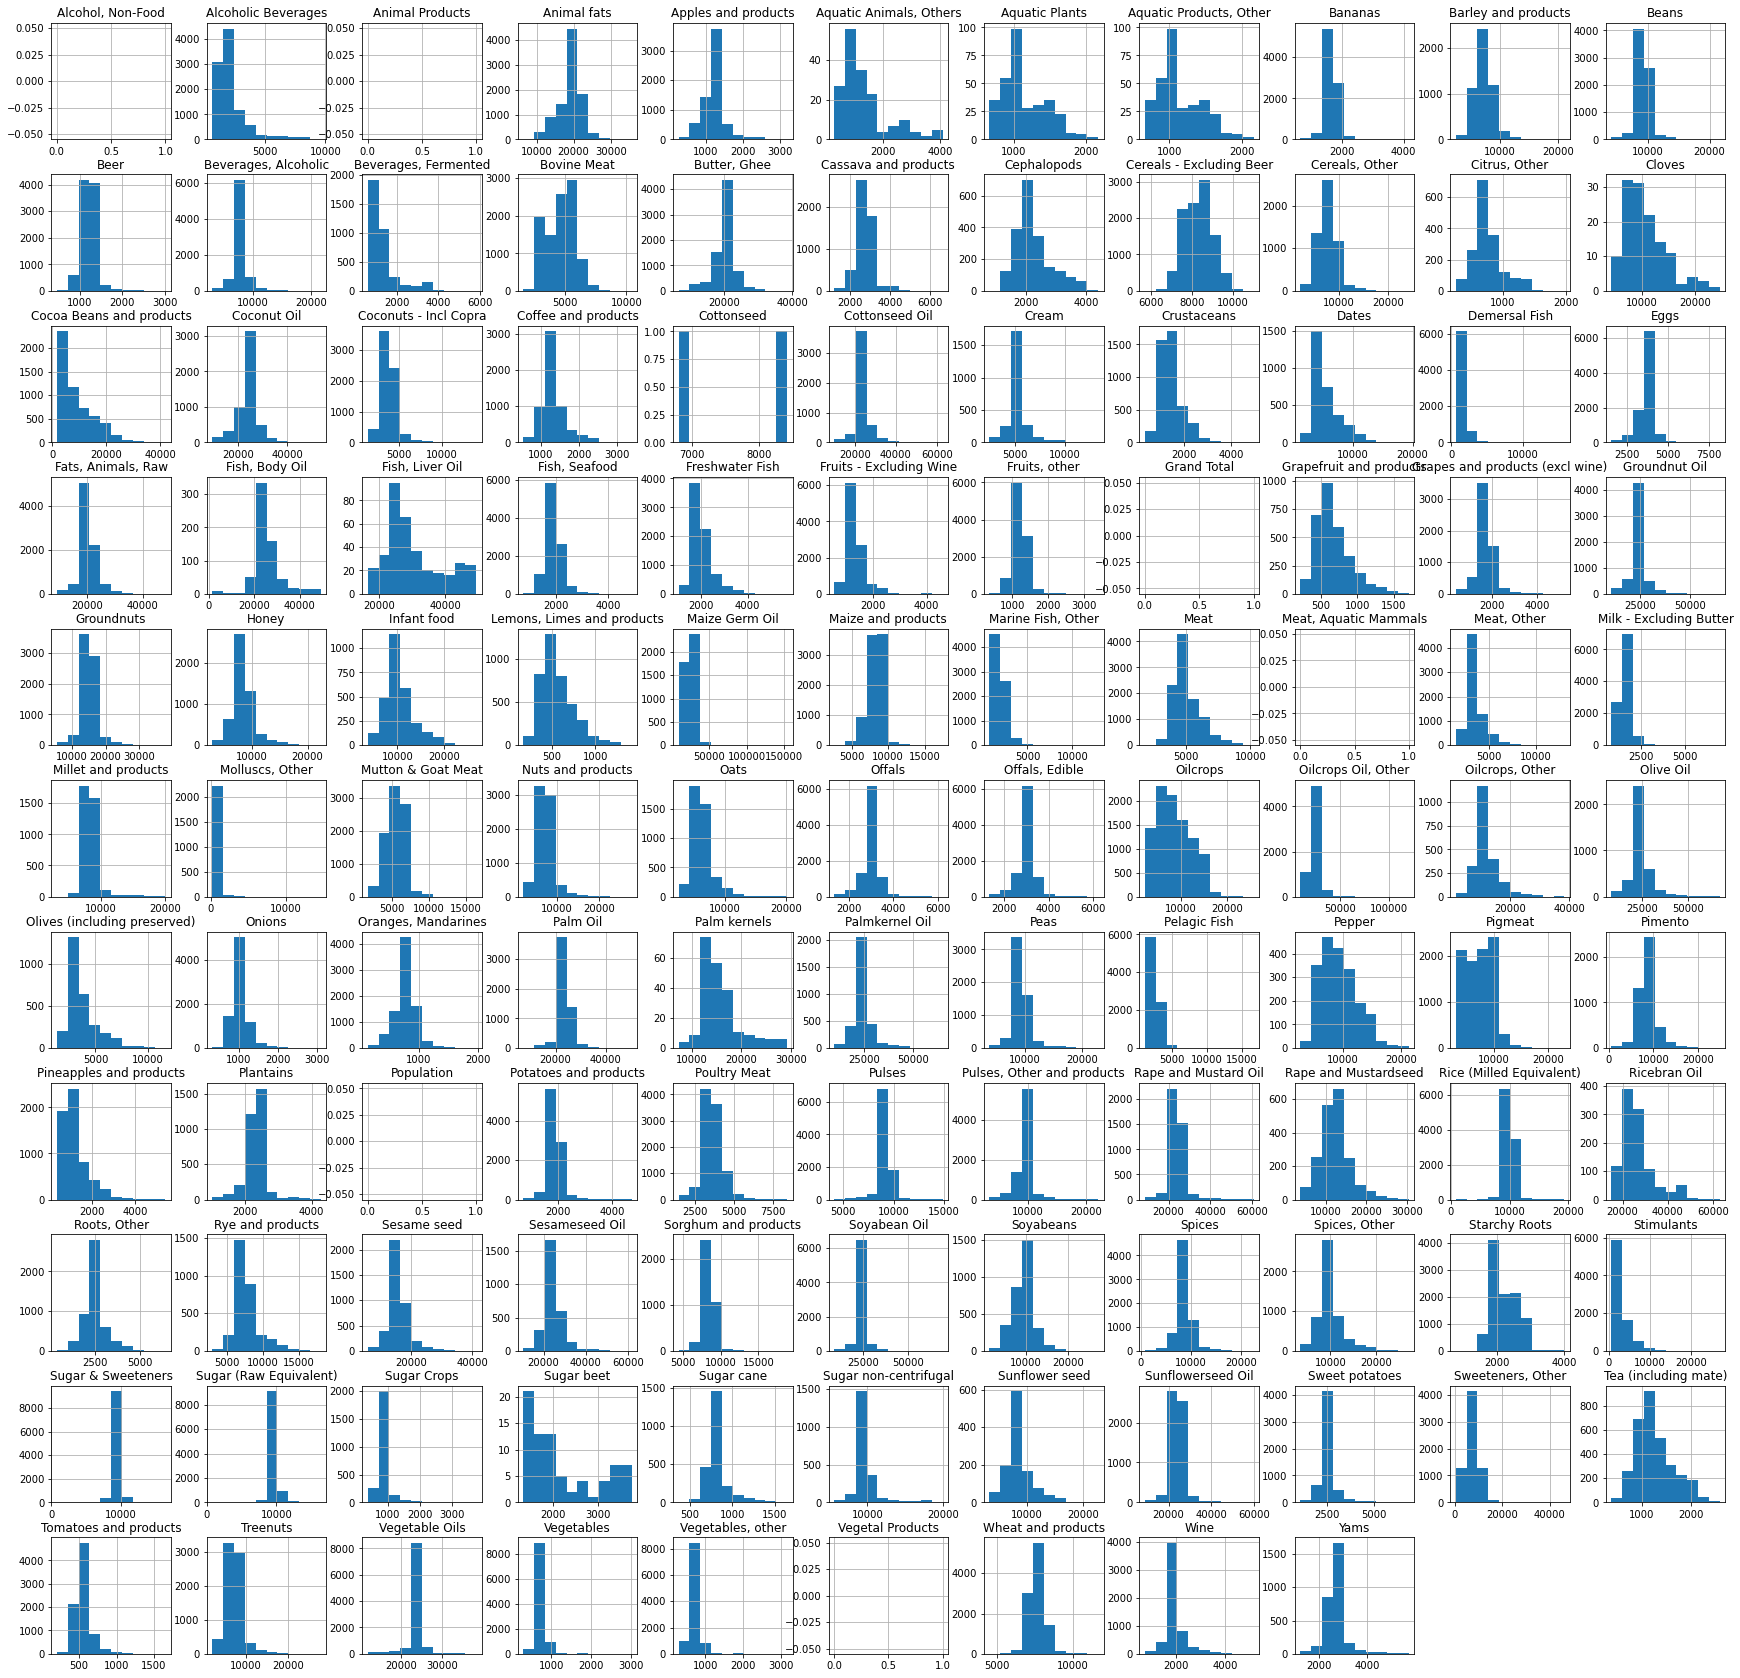

In [36]:
hists = plt.figure(figsize = (30,30))  # Size of the figure
ax = hists.gca()                                
caltonratcalc_df.hist(ax = ax)         # draw a histogram based on the dataset
plt.show()
del [caltonratcalc_df]

# Use the factors to calculate the desired variables

In [37]:
# Need to adapt as there are many NaNs that make the below line of code useless (integer - NaN = NaN)
# I'll write a function to work around this. When there is no Feed and Seed data, I will set them to 0,
# as they are generally close to 0, and discounting many countries because they do not have feed and 
# seed data would bias the analysis.  I am sacrificing some accuracy in the data for more and less bias data.
#fbs_pvt["net_production"] = fbs_pvt.apply(lambda row: row.Production - row.Feed - row.Seed, axis=1)

In [38]:
def net_prod_calc(df):
    prod = df["Production"].tolist()
    feed = df["Feed"].tolist()
    seed = df["Seed"].tolist()
    caltonrattotal = df["caltonrattotal"].tolist()
    caltonratpercap = df["caltonratpercap"].tolist()
    caltonratperarea = df["caltonratperarea"].tolist()
    # replace NaN with 0 for feed and seed
    feed = [0 if pd.isna(n) else n for n in feed]
    seed = [0 if pd.isna(n) else n for n in seed]
    net_prod1000tonnelist = []
    net_prodtotallist = []
    net_prodpercaplist = []
    net_prodperarealist = []
    for i in range(0,len(prod)):
        net_prod1000tonne = prod[i] - feed[i] - seed[i]
        net_prodtotal = net_prod1000tonne * caltonrattotal[i]
        net_prodpercap = net_prod1000tonne * caltonratpercap[i]
        net_prodperarea = net_prod1000tonne * caltonratperarea[i]
        net_prod1000tonnelist.append(net_prod1000tonne)
        net_prodtotallist.append(net_prodtotal)
        net_prodpercaplist.append(net_prodpercap)
        net_prodperarealist.append(net_prodperarea)
    return net_prod1000tonnelist, net_prodtotallist, net_prodpercaplist, net_prodperarealist

In [39]:
net_prod1000tonne, net_prodtotal, net_prodpercap, net_prodperarea = net_prod_calc(fbs_pvt)
fbs_pvt["net_prod1000tonne"] = net_prod1000tonne
fbs_pvt["net_prodtotal"] = net_prodtotal
fbs_pvt["net_prodpercap"] = net_prodpercap
fbs_pvt["net_prodperarea"] = net_prodperarea

# Calculating averages of multiple years

In [40]:
# years = [2015,2016,2017,2018,2019]

In [41]:
# def checkiflast(i,a,b,c):
#     if i == (len(a) - 1):
#         result = True
#     elif a[i] == a[i+1] and b[i] == b[i+1] and c[i] == c[i+1]:
#         result = False
#     else:
#         result = True
#     return result

In [42]:
# def timemean(df, years):
#     summed = 0
#     divisor = 0
#     to_del = []
#     result = []
#     Year_Code = df["Year_Code"].tolist()
#     Value = df["Value"].tolist()
#     Area_Code = df["Area_Code"].tolist()
#     Item_Code = df["Item_Code"].tolist()
#     Element_Code = df["Element_Code"].tolist()
#     for i in range(0,len(Year_Code)):
#         yr = Year_Code[i]
#         if (yr in years) == False:
#             to_del.append(i)
#         elif (yr in years) and (checkiflast(i,Area_Code,Item_Code,Element_Code) == False):   #check it is not the last year
#             to_del.append(i)
#             divisor = divisor + 1
#             summed = summed + Value[i]
#         else:# if it is the last year
#             divisor = divisor + 1
#             summed = summed + Value[i]
#             res = summed / divisor
#             result.append(res)
#             summed = 0
#             divisor = 0
#     return to_del, result

In [43]:
#to_del, result = timemean(fbs_df, years)

In [44]:
#fbs_df_small = fbs_df.drop(fbs_df.index[to_del])

In [45]:
#fbs_df_small["Value"] = result

In [46]:
#fbs_df_small.head()

In [47]:
#print(fbs_df_small.info())
#print(fbs_df_small.describe())

In [48]:
#fbs_df_small = fbs_df_small.reset_index(drop=True)

# Calculating the EATLI  & MAI for consumption

In [49]:
fbs_kcal = fbs_df.loc[fbs_df["Element"] == 'Food supply (kcal/capita/day)']

In [50]:
eatlitems = ["Grand Total", "Cereals - Excluding Beer", "Starchy Roots", "Vegetables", "Fruits - Excluding Wine", 
             "Milk - Excluding Butter", "Bovine Meat", "Pigmeat", "Poultry Meat", "Eggs", "Fish, Seafood", 
             "Pulses", "Soyabeans", "Groundnuts", "Treenuts", "Palm Oil", "Vegetable Oils", "Fats, Animals, Raw", 
             "Sugar Crops", "Butter, Ghee", "Cream", "Mutton & Goat Meat", "Sunflower seed", "Rape and Mustardseed",
             "Sesame seed", "Palmkernel Oil", "Palm Oil", "Coconut Oil", "Fish, Body Oil", "Fish, Liver Oil",
             "Sugar & Sweeteners", "totarea", "pop"]

eatlitemsfix = ["Grand_Total", "Cereals__Excluding_Beer", "Starchy_Roots", "Vegetables", "Fruits__Excluding_Wine", 
             "Milk__Excluding_Butter", "Bovine_Meat", "Pigmeat", "Poultry_Meat", "Eggs", "Fish_Seafood", 
             "Pulses", "Soyabeans", "Groundnuts", "Treenuts", "Palm_Oil", "Vegetable_Oils", "Fats_Animals_Raw", 
             "Sugar_Crops", "Butter_Ghee", "Cream", "Mutton__Goat_Meat", "Sunflower_seed", "Rape_and_Mustardseed",
             "Sesame_seed", "Palmkernel_Oil", "Palm_Oil", "Coconut_Oil", "Fish_Body_Oil", "Fish_Liver_Oil",
             "Sugar__Sweeteners", "totarea", "pop"]

meditems = ["Cereals - Excluding Beer","Fish, Seafood","Fruits - Excluding Wine","Groundnuts","Olives - including preserved",
       "Olive Oil","Soyabeans","Pulses","Spices","Starchy Roots","Treenuts","Vegetables","Wine","Alcoholic Beverages",
       "Animal fats","Meat","Miscellaneous","Offals","Oilcrops","Stimulants","Sugar & Sweeteners","Sugar Crops","Vegetable Oils"]

In [51]:
#fbs_kcal = fbs_kcal[fbs_kcal.Item.isin(eatlitems)]

In [52]:
fbs_kcal = fbs_kcal[["Area","Item","Year_Code","Value"]]

In [53]:
fbs_kcal.head(5)

,Area,Item,Year_Code,Value
44,Armenia,Wheat and products,1992,1215.0
45,Armenia,Wheat and products,1993,1256.0
46,Armenia,Wheat and products,1994,1127.0
47,Armenia,Wheat and products,1995,1200.0
48,Armenia,Wheat and products,1996,1117.0


In [54]:
fbs_kcal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071916 entries, 44 to 11117283
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Area       1071916 non-null  object 
 1   Item       1071916 non-null  object 
 2   Year_Code  1071916 non-null  int64  
 3   Value      1071916 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 40.9+ MB


In [55]:
fbs_kcal = pd.pivot(fbs_kcal, index=["Area","Year_Code"], columns="Item", values="Value")
fbs_kcal = fbs_kcal.reset_index()
fbs_kcal.columns=fbs_kcal.columns.str.replace(' ','_')
fbs_kcal.columns=fbs_kcal.columns.str.replace('-','')
fbs_kcal.columns=fbs_kcal.columns.str.replace('&','')
fbs_kcal.columns=fbs_kcal.columns.str.replace(',','')

In [56]:
def eatlicalc(df):
    df2 = df
    df = df.fillna(0)
    eatlist = []
    for i in range(0,len(df)):
        calratio = (df.at[i,"Grand_Total"]) / 2500
        eatli = 0
        values = []
        values.append((df.at[i,"Starchy_Roots"]) / (78 * calratio))
        values.append((df.at[i,"Milk__Excluding_Butter"] + df.at[i,"Butter_Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
        values.append((df.at[i,"Bovine_Meat"] + df.at[i,"Mutton__Goat_Meat"]) / (30 * calratio))
        values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
        values.append((df.at[i,"Poultry_Meat"]) / (124 * calratio))
        values.append((df.at[i,"Eggs"]) / (37 * calratio))
        values.append((df.at[i,"Fish_Seafood"]) / (143 * calratio))
        values.append((df.at[i,"Pulses"]) / (344 * calratio))
        values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
        values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
        values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower_seed"] + df.at[i,"Sesame_seed"]
                       + df.at[i,"Rape_and_Mustardseed"]) / (149 * calratio))
        values.append((df.at[i,"Palm_Oil"]) / (60 * calratio))
        values.append((df.at[i,"Fats_Animals_Raw"]) / (36 * calratio))
        values.append((df.at[i,"Sugar__Sweeteners"] + df.at[i,"Sugar_Crops"]) / (120 * calratio))
        for j in range(0,len(values)):
            if values[j] >= 1:
                eatli = eatli + values[j]
                
        unsaturated_oils = (df.at[i,"Vegetable_Oils"] - df.at[i,"Coconut_Oil"]- df.at[i,"Palm_Oil"] 
                           - df.at[i,"Palmkernel_Oil"] + df.at[i,"Fish_Body_Oil"] + df.at[i,"Fish_Liver_Oil"])
        vegetables = df.at[i,"Vegetables"]
        fruit = df.at[i,"Fruits__Excluding_Wine"]
        if unsaturated_oils >= (708 * calratio):
            eatli = eatli + (unsaturated_oils / (708 * calratio))
        if unsaturated_oils <= (177 * calratio):
            eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
        if vegetables >= (156 * calratio):
            eatli = eatli + (vegetables / (156 * calratio))
        if vegetables <= (52 * calratio):
            eatli = eatli + 2 - ((vegetables) / (52 * calratio))
            
        if fruit >= (189 * calratio):
            eatli = eatli + (fruit / (189 * calratio))
        if fruit <= (63 * calratio):
            eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
        if df.at[i,"Cereals__Excluding_Beer"] > (df.at[i,"Grand_Total"] * 0.6):
            eatli = eatli + (df.at[i,"Cereals__Excluding_Beer"] / (df.at[i,"Grand_Total"] * 0.6))
            
        nan_list = [df2.at[i,"Starchy_Roots"], df2.at[i,"Milk__Excluding_Butter"], df2.at[i,"Bovine_Meat"],
                    df2.at[i,"Mutton__Goat_Meat"], df2.at[i,"Pigmeat"], df2.at[i,"Poultry_Meat"], df2.at[i,"Eggs"],
                    df2.at[i,"Fish_Seafood"], df2.at[i,"Pulses"], df2.at[i,"Fats_Animals_Raw"], df2.at[i,"Vegetable_Oils"],
                    df2.at[i,"Vegetables",], df2.at[i,"Fruits__Excluding_Wine"], df2.at[i,"Cereals__Excluding_Beer"]]
        if np.count_nonzero(np.isnan(nan_list)) > 0:
            eatli = np.nan
        
        eatlist.append(eatli)
    return eatlist

In [57]:
def maicalc(df):
    df2 = df
    df = df[["Cereals__Excluding_Beer","Fish_Seafood","Fruits__Excluding_Wine","Groundnuts","Olives_(including_preserved)",
           "Olive_Oil","Soyabeans","Pulses","Spices","Starchy_Roots","Treenuts","Vegetables","Wine","Alcoholic_Beverages",
           "Animal_fats","Meat","Offals","Oilcrops","Stimulants","Sugar__Sweeteners","Sugar_Crops","Vegetable_Oils"]]
    df = df.fillna(0)
    df[df < 0] = 0
    n = df._get_numeric_data()
    n[n < 0] = 0
    mailist = []
    for i in range(0,len(df)):
        med = (df.at[i,"Cereals__Excluding_Beer"] + df.at[i,"Fish_Seafood"] + df.at[i,"Fruits__Excluding_Wine"] + 
               df.at[i,"Groundnuts"] + df.at[i,"Olives_(including_preserved)"] + df.at[i,"Olive_Oil"] + df.at[i,"Soyabeans"]
               + df.at[i,"Pulses"] + df.at[i,"Spices"] + df.at[i,"Starchy_Roots"] + df.at[i,"Treenuts"] + 
               df.at[i,"Vegetables"] + df.at[i,"Wine"])
        nonmed = (df.at[i,"Alcoholic_Beverages"] - df.at[i,"Wine"] + df.at[i,"Animal_fats"] + df.at[i,"Meat"] + 
                  df.at[i,"Offals"] + df.at[i,"Oilcrops"] - df.at[i,"Groundnuts"] - 
                  df.at[i,"Olives_(including_preserved)"] - df.at[i,"Soyabeans"] + df.at[i,"Stimulants"] + 
                  df.at[i,"Sugar__Sweeteners"] + df.at[i,"Sugar_Crops"] + df.at[i,"Vegetable_Oils"] - df.at[i,"Olive_Oil"])
        nan_list = [df2.at[i,"Cereals__Excluding_Beer"], df2.at[i,"Fish_Seafood"], df2.at[i,"Fruits__Excluding_Wine"],
                    df2.at[i,"Soyabeans"], df2.at[i,"Pulses"], df2.at[i,"Starchy_Roots"], df2.at[i,"Vegetables"], df2.at[i,"Animal_fats"],
                    df2.at[i,"Meat",], df2.at[i,"Vegetable_Oils"], df2.at[i,"Sugar__Sweeteners"], df2.at[i,"Sugar_Crops"]]
        mai = med/nonmed
        if np.count_nonzero(np.isnan(nan_list)) > 2:
            mai = np.nan
        mailist.append(mai)
    return mailist

In [58]:
fbs_kcal["eatli"] = eatlicalc(fbs_kcal)
fbs_kcal["mai"] = maicalc(fbs_kcal)

C:\Users\T430\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eatli'>

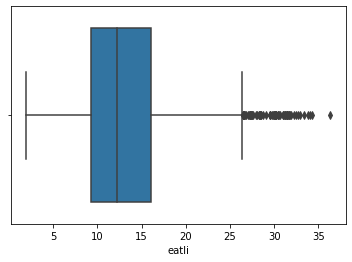

In [59]:
sns.boxplot(fbs_kcal["eatli"])

array([[<AxesSubplot:title={'center':'eatli'}>]], dtype=object)

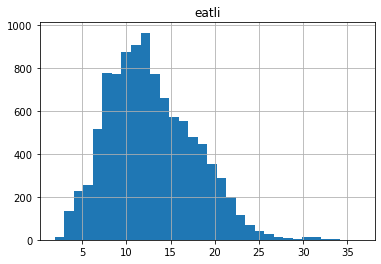

In [60]:
fbs_kcal.hist(column='eatli', bins=32)

<AxesSubplot:xlabel='mai'>

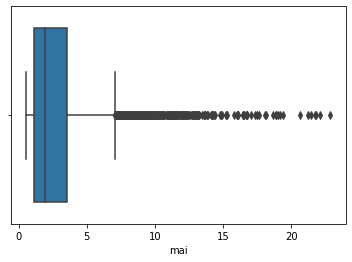

In [61]:
sns.boxplot(x=fbs_kcal["mai"])

array([[<AxesSubplot:title={'center':'mai'}>]], dtype=object)

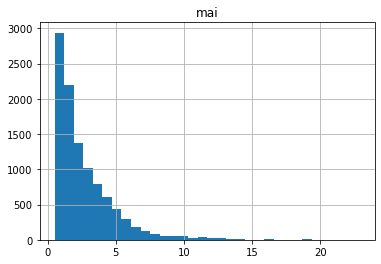

In [62]:
fbs_kcal.hist(column='mai', bins=32)

In [63]:
print(fbs_kcal.info())
print(fbs_kcal.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Columns: 121 entries, Area to mai
dtypes: float64(119), int64(1), object(1)
memory usage: 9.6+ MB
None
Item      Year_Code  Alcoholic_Beverages  Animal_Products   Animal_fats  \
count  10393.000000         10340.000000     10393.000000  10393.000000   
mean    1987.725585            74.391393       484.303473     78.635139   
std       15.357741            70.063006       346.391854     92.226824   
min     1961.000000             0.000000        33.000000      0.000000   
25%     1974.000000            19.000000       186.000000     16.000000   
50%     1988.000000            52.000000       385.000000     42.000000   
75%     2001.000000           116.000000       731.000000    101.000000   
max     2013.000000           474.000000      1598.000000    635.000000   

Item   Apples_and_products  Aquatic_Animals_Others  Aquatic_Plants  \
count         10393.000000             8354.000000     9758.000000   
mean 

In [64]:
fbs_areaXyear["eatliconsumption"] = add_item(fbs_areaXyear, fbs_kcal, "eatli")
fbs_areaXyear["eatliconsumption_LN"] = fbs_areaXyear["eatliconsumption"].apply(lambda x: np.log(x + 1))

fbs_areaXyear["maiconsumption"] = add_item(fbs_areaXyear, fbs_kcal, "mai")
fbs_areaXyear["maiconsumption_LN"] = fbs_areaXyear["maiconsumption"].apply(lambda x: np.log(x + 1))

fbs_areaXyear["totalkcal"] = add_item(fbs_areaXyear, fbs_kcal, "Grand_Total")


del [fbs_kcal]

# EATLI for production

In [65]:
catstotot = ["Cereals__Excluding_Beer","Eggs","Fish_Seafood","Fruits__Excluding_Wine","Meat",
             "Milk__Excluding_Butter","Offals","Oilcrops","Pulses","Spices","Starchy_Roots",
             "Stimulants","Sugar__Sweeteners","Sugar_Crops","Treenuts","Vegetable_Oils","Vegetables",
             "Alcoholic_Beverages","Animal_fats","Aquatic_Products_Other"]

In [66]:
allnecessary = ["Cereals - Excluding Beer","Eggs","Fish, Seafood","Fruits - Excluding Wine","Meat", "Milk - Excluding Butter",
                "Offals","Oilcrops","Pulses","Spices","Starchy Roots", "Stimulants","Sugar & Sweeteners","Sugar Crops",
                "Treenuts","Vegetable Oils","Vegetables", "Alcoholic Beverages","Animal fats","Aquatic Products, Other",
                "Grand Total", "Bovine Meat", "Pigmeat", "Poultry Meat", "Soyabeans", "Groundnuts", "Treenuts", "Palm Oil",
                "Fats, Animals, Raw", "Butter, Ghee", "Cream", "Mutton & Goat Meat", "Sunflower seed", "Rape and Mustardseed",
                "Sesame seed", "Palmkernel Oil", "Coconut Oil", "Fish, Body Oil", "Fish, Liver Oil", "totarea", "pop"]

In [67]:
fbs_prod = fbs_pvt[["Area","Item","Year_Code","net_prodtotal","net_prodpercap","net_prodperarea"]]

In [68]:
#fbs_prod = fbs_prod[fbs_prod.Item.isin(allnecessary)]
fbs_prod.head()

Element,Area,Item,Year_Code,net_prodtotal,net_prodpercap,net_prodperarea
0,Afghanistan,Alcoholic Beverages,1961,NaN,NaN,NaN
1,Afghanistan,Animal Products,1961,NaN,NaN,NaN
2,Afghanistan,Animal fats,1961,420838.000000,47.000000,6.452294
3,Afghanistan,Apples and products,1961,19187.142857,2.142857,0.294178
4,Afghanistan,Bananas,1961,NaN,NaN,NaN


In [69]:
# Setting up the pivot tables
fbs_prodtot = pd.pivot(fbs_prod, index=["Area","Year_Code"], columns="Item", values="net_prodtotal")
fbs_prodtot = fbs_prodtot.reset_index()
fbs_prodtot.columns=fbs_prodtot.columns.str.replace(' ','_')
fbs_prodtot.columns=fbs_prodtot.columns.str.replace('-','')
fbs_prodtot.columns=fbs_prodtot.columns.str.replace('&','')
fbs_prodtot.columns=fbs_prodtot.columns.str.replace(',','')

fbs_prodpercap = pd.pivot(fbs_prod, index=["Area","Year_Code"], columns="Item", values="net_prodpercap")
fbs_prodpercap = fbs_prodpercap.reset_index()
fbs_prodpercap.columns=fbs_prodpercap.columns.str.replace(' ','_')
fbs_prodpercap.columns=fbs_prodpercap.columns.str.replace('-','')
fbs_prodpercap.columns=fbs_prodpercap.columns.str.replace('&','')
fbs_prodpercap.columns=fbs_prodpercap.columns.str.replace(',','')

fbs_prodperarea = pd.pivot(fbs_prod, index=["Area","Year_Code"], columns="Item", values="net_prodperarea")
fbs_prodperarea = fbs_prodperarea.reset_index()
fbs_prodperarea.columns=fbs_prodperarea.columns.str.replace(' ','_')
fbs_prodperarea.columns=fbs_prodperarea.columns.str.replace('-','')
fbs_prodperarea.columns=fbs_prodperarea.columns.str.replace('&','')
fbs_prodperarea.columns=fbs_prodperarea.columns.str.replace(',','')

In [70]:
def calcgrandtotal(df):
    grandtotlist = []
    for i in range(0,len(df)):
        grandtot = 0
        for j in catstotot:
            if df.at[i,j] > 0:
                grandtot = grandtot + df.at[i,j]
        grandtotlist.append(grandtot)
    return grandtotlist

In [71]:
fbs_prodpercap["Grand_Total"] = calcgrandtotal(fbs_prodpercap)
fbs_prodtot["Grand_Total"] = calcgrandtotal(fbs_prodtot)
fbs_prodperarea["Grand_Total"] = calcgrandtotal(fbs_prodperarea)

In [72]:
def eatlicalcprod(df):
    df2 = df
    df = df.fillna(0)
    eatlist = []
    for i in range(0,len(df)):
        calratio = 1
        eatli = 0
        values = []
        values.append((df.at[i,"Starchy_Roots"]) / (78 * calratio))
        values.append((df.at[i,"Milk__Excluding_Butter"] + df.at[i,"Butter_Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
        values.append((df.at[i,"Bovine_Meat"] + df.at[i,"Mutton__Goat_Meat"]) / (30 * calratio))
        values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
        values.append((df.at[i,"Poultry_Meat"]) / (124 * calratio))
        values.append((df.at[i,"Eggs"]) / (37 * calratio))
        values.append((df.at[i,"Fish_Seafood"]) / (143 * calratio))
        values.append((df.at[i,"Pulses"]) / (344 * calratio))
        values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
        values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
        values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower_seed"] + df.at[i,"Sesame_seed"]
                       + df.at[i,"Rape_and_Mustardseed"]) / (149 * calratio))
        values.append((df.at[i,"Palm_Oil"]) / (60 * calratio))
        values.append((df.at[i,"Fats_Animals_Raw"]) / (36 * calratio))
        values.append((df.at[i,"Sugar__Sweeteners"] + df.at[i,"Sugar_Crops"]) / (120 * calratio))
        for j in range(0,len(values)):
            if values[j] > 0:
                eatli = eatli + values[j]

                
        unsaturated_oils = (df.at[i,"Vegetable_Oils"] - df.at[i,"Coconut_Oil"]- df.at[i,"Palm_Oil"] 
                           - df.at[i,"Palmkernel_Oil"] + df.at[i,"Fish_Body_Oil"] + df.at[i,"Fish_Liver_Oil"])
        vegetables = df.at[i,"Vegetables"]
        fruit = df.at[i,"Fruits__Excluding_Wine"]
        values.append(unsaturated_oils)
        values.append(vegetables)
        values.append(fruit)
        values.append(df.at[i,"Cereals__Excluding_Beer"])
        if unsaturated_oils > (708 * calratio):
            eatli = eatli + (unsaturated_oils / (708 * calratio))
        if unsaturated_oils < (177 * calratio):
            eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
        if vegetables > (156 * calratio):
            eatli = eatli + (vegetables / (156 * calratio))
        if vegetables < (52 * calratio):
            eatli = eatli + 2 - ((vegetables) / (52 * calratio))
            
        if fruit > (189 * calratio):
            eatli = eatli + (fruit / (189 * calratio))
        if fruit < (63 * calratio):
            eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
        if df.at[i,"Cereals__Excluding_Beer"] > (df.at[i,"Grand_Total"] * 0.6):
            eatli = eatli + (df.at[i,"Cereals__Excluding_Beer"] / (df.at[i,"Grand_Total"] * 0.6))        
        
        nan_list = [df2.at[i,"Starchy_Roots"], df2.at[i,"Milk__Excluding_Butter"], df2.at[i,"Bovine_Meat"],
                    df2.at[i,"Mutton__Goat_Meat"], df2.at[i,"Pigmeat"], df2.at[i,"Poultry_Meat"], df2.at[i,"Eggs"],
                    df2.at[i,"Fish_Seafood"], df2.at[i,"Pulses"], df2.at[i,"Fats_Animals_Raw"], df2.at[i,"Vegetable_Oils"],
                    df2.at[i,"Vegetables",], df2.at[i,"Fruits__Excluding_Wine"], df2.at[i,"Cereals__Excluding_Beer"]]
        if np.count_nonzero(np.isnan(nan_list)) > 0:
            eatli = np.nan
        
        eatlist.append(eatli)
    return eatlist

In [73]:
fbs_prodpercap["eatliprodpercap"] = eatlicalcprod(fbs_prodpercap)
fbs_prodtot["eatliprodtot"] = eatlicalcprod(fbs_prodtot)
fbs_prodperarea["eatliprodperarea"] = eatlicalcprod(fbs_prodperarea)
fbs_areaXyear["eatliprodpercap"] = add_item(fbs_areaXyear, fbs_prodpercap, "eatliprodpercap")
fbs_areaXyear["eatliprodtot"] = add_item(fbs_areaXyear, fbs_prodtot, "eatliprodtot")
fbs_areaXyear["eatliprodperarea"] = add_item(fbs_areaXyear, fbs_prodperarea, "eatliprodperarea")

In [74]:
fbs_areaXyear["eatliprodpercap_LN"] = fbs_areaXyear["eatliprodpercap"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["eatliprodtot_LN"] = fbs_areaXyear["eatliprodtot"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["eatliprodperarea_LN"] = fbs_areaXyear["eatliprodperarea"].apply(lambda x: np.log(x + 1))

<AxesSubplot:xlabel='eatliprodpercap'>

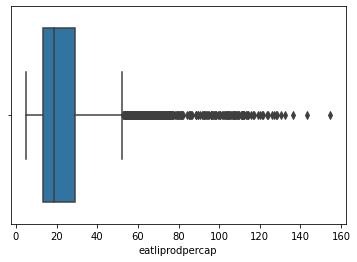

In [75]:
sns.boxplot(x=fbs_areaXyear["eatliprodpercap"])

array([[<AxesSubplot:title={'center':'eatliprodpercap'}>]], dtype=object)

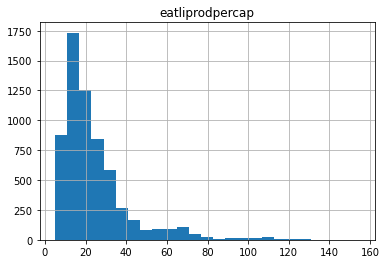

In [76]:
fbs_areaXyear.hist(column='eatliprodpercap', bins=25)

<AxesSubplot:xlabel='eatliprodpercap_LN'>

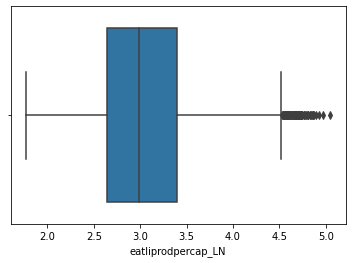

In [77]:
sns.boxplot(x=fbs_areaXyear["eatliprodpercap_LN"])

array([[<AxesSubplot:title={'center':'eatliprodpercap_LN'}>]],
      dtype=object)

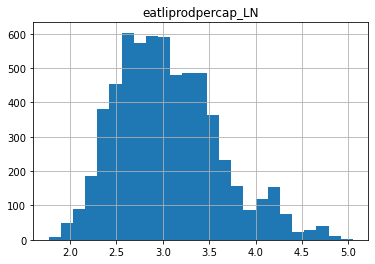

In [78]:
fbs_areaXyear.hist(column='eatliprodpercap_LN', bins=25)

<AxesSubplot:xlabel='eatliprodtot'>

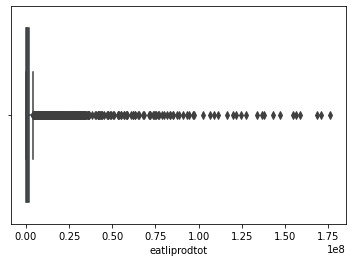

In [79]:
sns.boxplot(x=fbs_areaXyear["eatliprodtot"])

array([[<AxesSubplot:title={'center':'eatliprodtot'}>]], dtype=object)

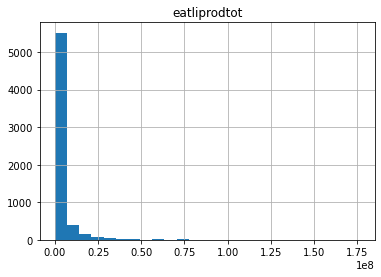

In [80]:
fbs_areaXyear.hist(column='eatliprodtot', bins=25)

<AxesSubplot:xlabel='eatliprodtot_LN'>

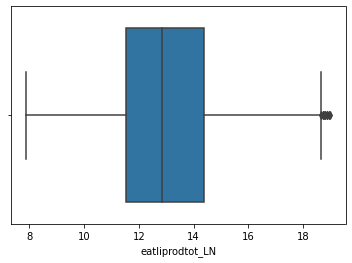

In [81]:
sns.boxplot(x=fbs_areaXyear["eatliprodtot_LN"])

array([[<AxesSubplot:title={'center':'eatliprodtot_LN'}>]], dtype=object)

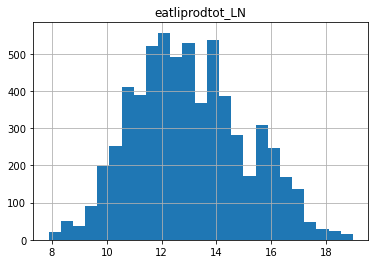

In [82]:
fbs_areaXyear.hist(column='eatliprodtot_LN', bins=25)

<AxesSubplot:xlabel='eatliprodperarea'>

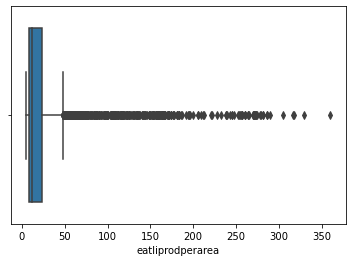

In [83]:
sns.boxplot(x=fbs_areaXyear["eatliprodperarea"])

array([[<AxesSubplot:title={'center':'eatliprodperarea'}>]], dtype=object)

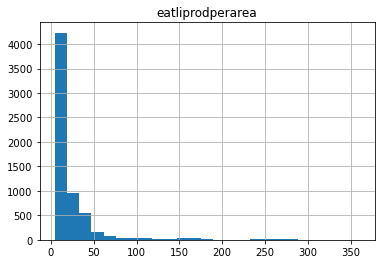

In [84]:
fbs_areaXyear.hist(column='eatliprodperarea', bins=25)

<AxesSubplot:xlabel='eatliprodperarea_LN'>

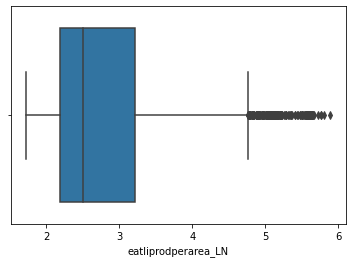

In [85]:
sns.boxplot(x=fbs_areaXyear["eatliprodperarea_LN"])

array([[<AxesSubplot:title={'center':'eatliprodperarea_LN'}>]],
      dtype=object)

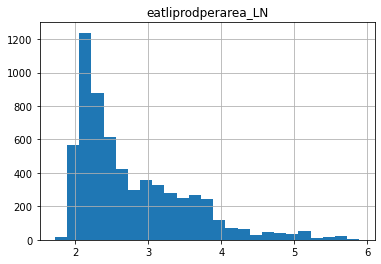

In [86]:
fbs_areaXyear.hist(column='eatliprodperarea_LN', bins=25)

In [87]:
print(fbs_areaXyear.info())
print(fbs_areaXyear.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 10393 non-null  object 
 1   Year_Code            10393 non-null  int64  
 2   Population           10393 non-null  float64
 3   totarea              10393 non-null  float64
 4   eatliconsumption     10084 non-null  float64
 5   eatliconsumption_LN  10084 non-null  float64
 6   maiconsumption       10371 non-null  float64
 7   maiconsumption_LN    10371 non-null  float64
 8   totalkcal            10393 non-null  float64
 9   eatliprodpercap      6267 non-null   float64
 10  eatliprodtot         6267 non-null   float64
 11  eatliprodperarea     6267 non-null   float64
 12  eatliprodpercap_LN   6267 non-null   float64
 13  eatliprodtot_LN      6267 non-null   float64
 14  eatliprodperarea_LN  6267 non-null   float64
dtypes: float64(13), int64(1), object(1)


C:\Users\T430\AppData\Local\Temp/ipykernel_8528/3634186963.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  fbs_areaXyear.hist(ax = ax)         # draw a histogram based on the dataset


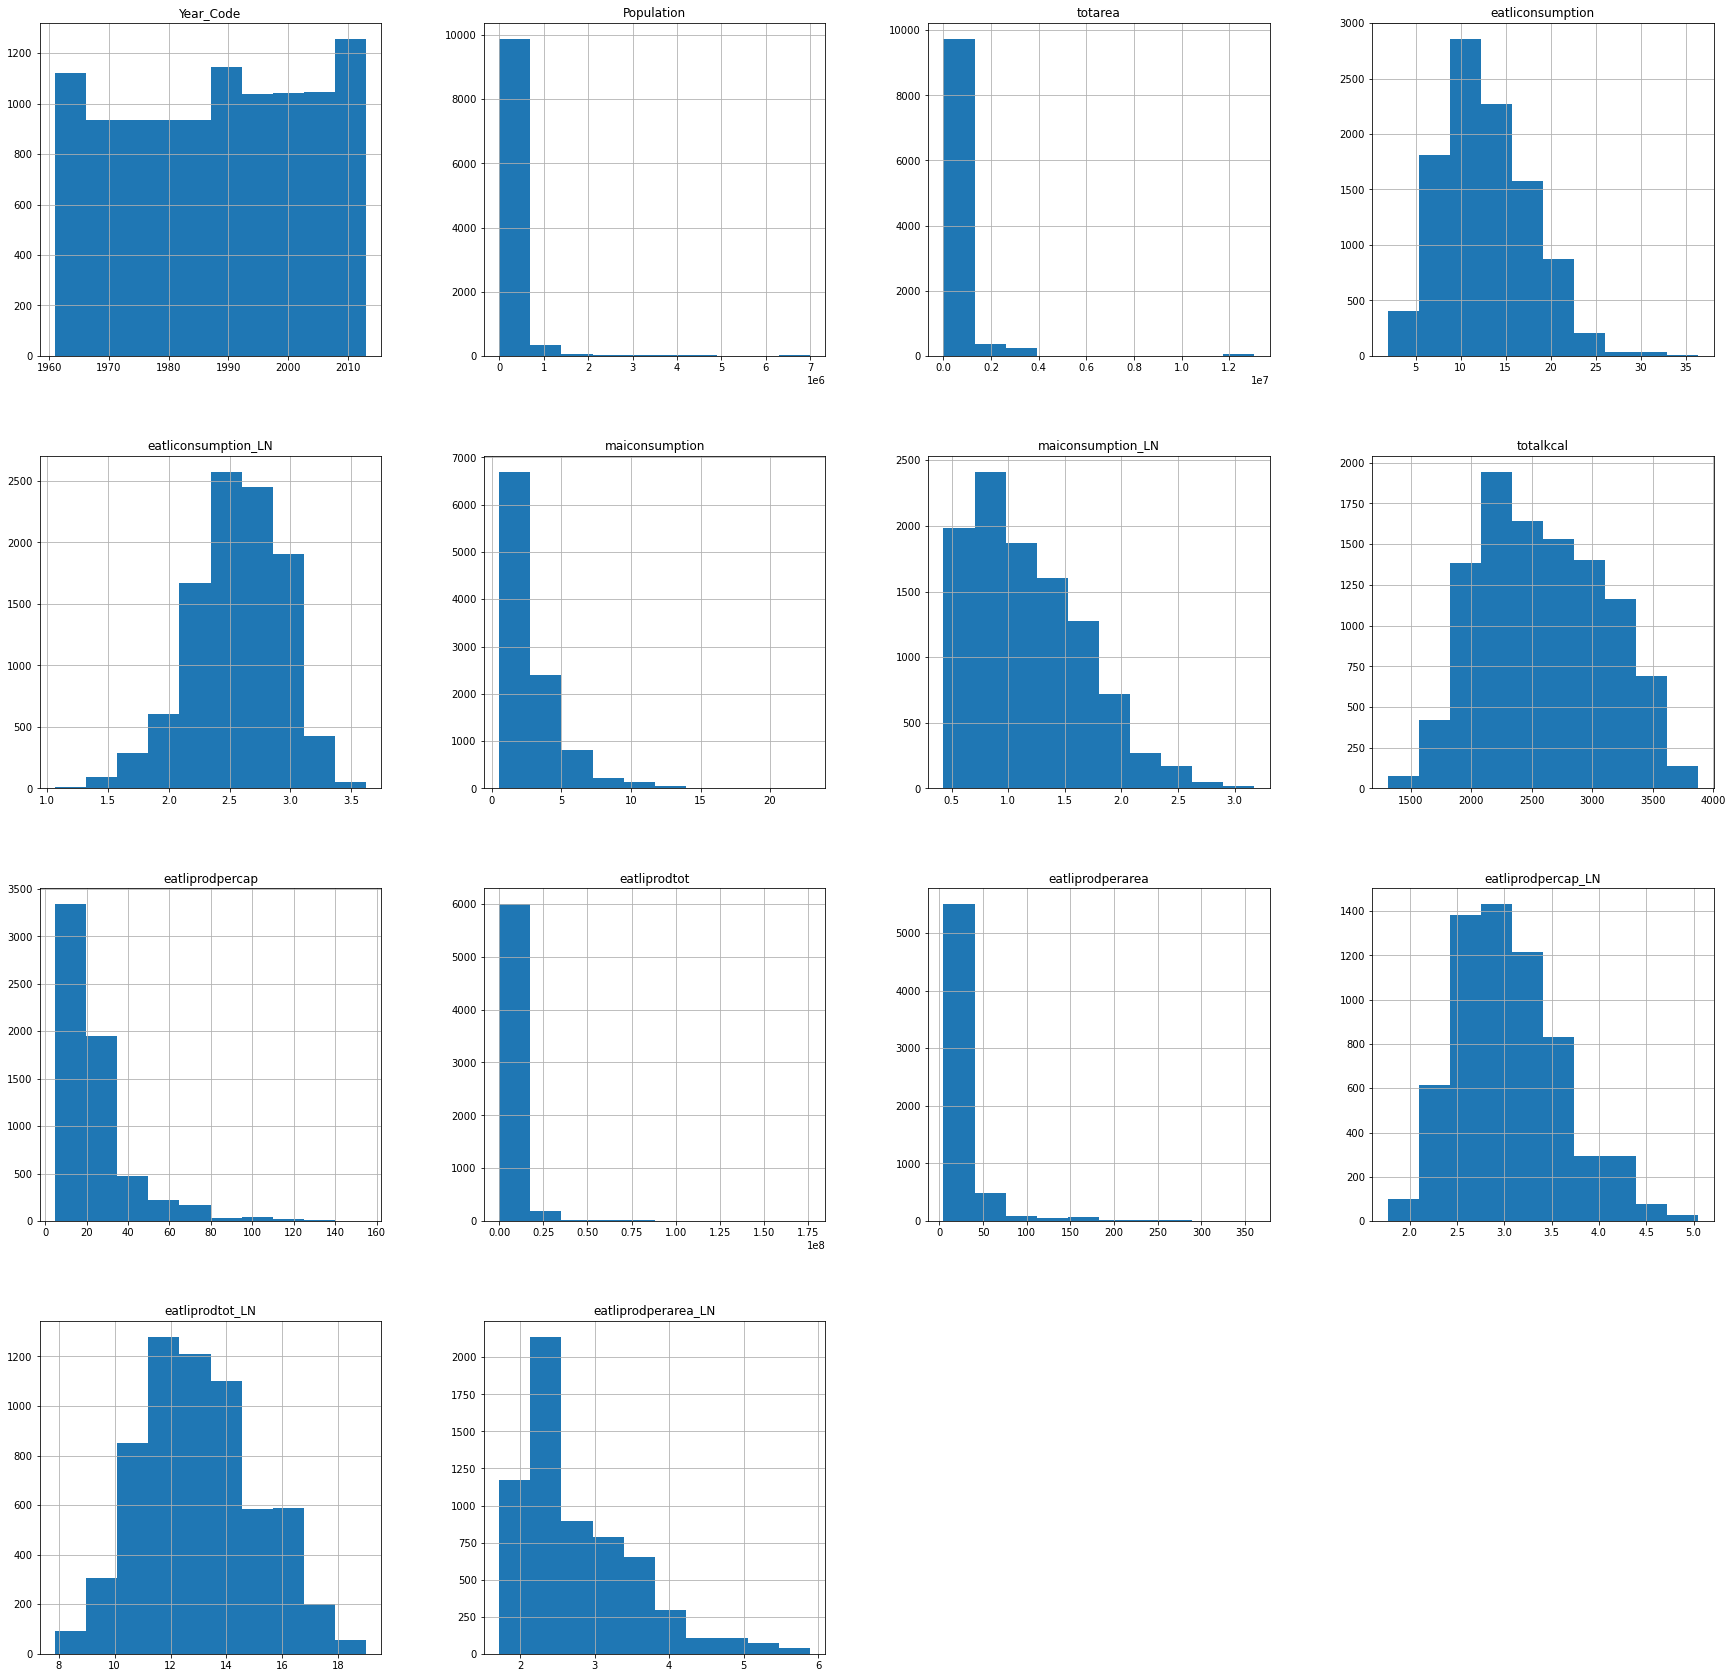

In [88]:
hists = plt.figure(figsize = (30,30))  # Size of the figure
ax = hists.gca()                                
fbs_areaXyear.hist(ax = ax)         # draw a histogram based on the dataset
plt.show()

# MAI for production

In [89]:
fbs_prodpercap["maiprod"] = maicalc(fbs_prodpercap)
fbs_areaXyear["maiprod"] = add_item(fbs_areaXyear, fbs_prodpercap, "maiprod")

del [fbs_prodtot, fbs_prodpercap, fbs_prodperarea]

C:\Users\T430\AppData\Local\Temp/ipykernel_8528/1147338951.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  mai = med/nonmed


In [90]:
fbs_areaXyear["maiprod_LN"] = fbs_areaXyear["maiprod"].apply(lambda x: np.log(x + 1))

# Adding environmental indicators

In [91]:
# I already made the landuse df

pesticides_df = pd.read_csv("Inputs_Pesticides_Use_E_All_Data_(Normalized).csv", encoding="latin-1")
pesticides_df.columns=pesticides_df.columns.str.replace(' ','_')
fertilizer_df = pd.read_csv("Inputs_FertilizersNutrient_E_All_Data_(Normalized).csv", encoding="latin-1")
fertilizer_df.columns=fertilizer_df.columns.str.replace(' ','_')
manure_df = pd.read_csv("Environment_LivestockManure_E_All_Data_(Normalized).csv", encoding="latin-1")
manure_df.columns=manure_df.columns.str.replace(' ','_')

In [92]:
primary_land_variables = ['Land area', 'Agriculture', "Cropland", "Land under perm. meadows and pastures",
                        "Naturally regenerating forest", "Planted Forest", "Primary_Forest",
                         "Land area equipped for irrigation"]

secondary_land_variables = ['Land area', 'Agriculture', "Cropland", "Land under perm. meadows and pastures",
                         "Perm. meadows & pastures - Cultivated", "Perm. meadows & pastures - Nat. growing",
                        "Forest land", "Naturally regenerating forest", "Planted Forest", "Primary Forest",
                         "Agriculture area under organic agric.", "Cropland area under organic agric.",
                         "Perm. meadows & pastures area under organic agric.", 'Land area equipped for irrigation',
                        'Agriculture area actually irrigated']

landuse_df = landuse_df[landuse_df.Item.isin(secondary_land_variables)]

In [93]:
pesticides_df.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1990,1990,tonnes,121.0,A
1,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1991,1991,tonnes,121.0,A
2,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1992,1992,tonnes,121.0,A
3,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1993,1993,tonnes,121.0,A
4,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1994,1994,tonnes,201.0,A


In [94]:
pesticides_df = pesticides_df.loc[pesticides_df["Item"] == "Pesticides (total)"]
pesticides_df = pesticides_df.loc[pesticides_df["Element"] == "Agricultural Use"]

In [95]:
fertilizer_df.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1974,1974,tonnes,19117.0,Qm
1,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1975,1975,tonnes,14774.0,Qm
2,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1976,1976,tonnes,26203.0,Qm
3,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1977,1977,tonnes,37689.0,Qm
4,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1978,1978,tonnes,48300.0,Qm


In [96]:
fertilizer_df = fertilizer_df.loc[fertilizer_df["Element"] == "Agricultural Use"]

In [97]:
manure_df.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,2,Afghanistan,1107,Asses,5111,Stocks,1961,1961,Head,1300000.0,NaN
1,2,Afghanistan,1107,Asses,5111,Stocks,1962,1962,Head,851850.0,NaN
2,2,Afghanistan,1107,Asses,5111,Stocks,1963,1963,Head,1001112.0,NaN
3,2,Afghanistan,1107,Asses,5111,Stocks,1964,1964,Head,1150000.0,F
4,2,Afghanistan,1107,Asses,5111,Stocks,1965,1965,Head,1300000.0,NaN


In [98]:
manure_small = manure_df.loc[manure_df["Item"] == "All Animals"]

In [99]:
primary_manure_variables = ['Manure left on pasture that volatilises (N content)',
                            'Manure left on pasture that leaches (N content)',
                            "Losses from manure treated (N content)",
                            "Manure applied to soils that volatilises (N content)",
                            "Manure applied to soils that leaches (N content)"]

manure_small = manure_small[manure_small.Element.isin(primary_manure_variables)]

In [100]:
landuse_piv = pd.pivot_table(landuse_df, index=["Area","Year_Code"], columns="Item", values="Value")
landuse_piv.columns=landuse_piv.columns.str.replace(' ','_', regex=True)
landuse_piv.columns=landuse_piv.columns.str.replace('-','', regex=True)
landuse_piv.columns=landuse_piv.columns.str.replace('&','', regex=True)
landuse_piv.columns=landuse_piv.columns.str.replace(',','', regex=True)
landuse_piv.columns=landuse_piv.columns.str.replace('.','', regex=True)
landuse_piv = landuse_piv.reset_index()

In [101]:
fertilizer_piv = pd.pivot_table(fertilizer_df, index=["Area","Year_Code"], columns="Item", values="Value")
fertilizer_piv.rename(columns = {"Nutrient nitrogen N (total)":"nitrogen", "Nutrient phosphate P2O5 (total)":"phosphate",
                                 "Nutrient potash K2O (total)":"potash"}, inplace = True)
fertilizer_piv = fertilizer_piv.reset_index()

In [102]:
pesticides_piv = pd.pivot_table(pesticides_df, index=["Area","Year_Code"], columns="Item", values="Value")
pesticides_piv.rename(columns = {"Pesticides (total)":"Pesticides"}, inplace = True)
pesticides_piv = pesticides_piv.reset_index()

In [103]:
manure_piv = pd.pivot_table(manure_small, index=["Area","Year_Code"], columns="Element", values="Value")
manure_piv.columns=manure_piv.columns.str.replace('N content','', regex=True)
manure_piv.columns=manure_piv.columns.str.replace('(','', regex=True)
manure_piv.columns=manure_piv.columns.str.replace(')','', regex=True)
manure_piv.columns=manure_piv.columns.str.replace(' ','_', regex=True)
manure_piv = manure_piv.reset_index()

In [104]:
manure_piv["manure_leech"] = manure_piv["Manure_applied_to_soils_that_leaches_"] + manure_piv["Manure_left_on_pasture_that_leaches_"]
manure_piv["manure_vol"] = manure_piv["Manure_applied_to_soils_that_volatilises_"] + manure_piv["Manure_left_on_pasture_that_volatilises_"] + manure_piv["Losses_from_manure_treated_"]

In [105]:
fertilizer_piv.head()

Item,Area,Year_Code,nitrogen,phosphate,potash
0,Afghanistan,1961,1000.0,100.0,NaN
1,Afghanistan,1962,1000.0,100.0,NaN
2,Afghanistan,1963,1000.0,100.0,NaN
3,Afghanistan,1964,1000.0,100.0,NaN
4,Afghanistan,1965,1000.0,100.0,NaN


In [106]:
pesticides_piv.head()

Item,Area,Year_Code,Pesticides
0,Africa,1990,65943.0
1,Africa,1991,62720.0
2,Africa,1992,54424.0
3,Africa,1993,49613.0
4,Africa,1994,51088.0


In [107]:
manure_piv.head()

Element,Area,Year_Code,Losses_from_manure_treated_,Manure_applied_to_soils_that_leaches_,Manure_applied_to_soils_that_volatilises_,Manure_left_on_pasture_that_leaches_,Manure_left_on_pasture_that_volatilises_,manure_leech,manure_vol
0,Afghanistan,1961,2.011527e+06,1.687356e+07,1.124904e+07,9.540229e+07,6.360153e+07,1.122759e+08,7.686210e+07
1,Afghanistan,1962,2.078154e+06,1.711394e+07,1.140929e+07,9.315461e+07,6.210307e+07,1.102685e+08,7.559052e+07
2,Afghanistan,1963,2.255928e+06,1.757827e+07,1.171885e+07,9.547398e+07,6.364932e+07,1.130523e+08,7.762410e+07
3,Afghanistan,1964,2.267957e+06,1.794177e+07,1.196118e+07,9.680027e+07,6.453351e+07,1.147420e+08,7.876265e+07
4,Afghanistan,1965,2.454783e+06,1.848616e+07,1.232411e+07,9.892931e+07,6.595288e+07,1.174155e+08,8.073177e+07


In [108]:
landuse_piv.head()

Item,Area,Year_Code,Agriculture,Agriculture_area_actually_irrigated,Agriculture_area_under_organic_agric,Cropland,Cropland_area_under_organic_agric,Forest_land,Land_area,Land_area_equipped_for_irrigation,Land_under_perm_meadows_and_pastures,Naturally_regenerating_forest,Perm_meadows__pastures__Cultivated,Perm_meadows__pastures__Nat_growing,Perm_meadows__pastures_area_under_organic_agric,Planted_Forest,Primary_Forest
0,Afghanistan,1961,37700.0,NaN,NaN,7700.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1962,37760.0,NaN,NaN,7760.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1963,37810.0,NaN,NaN,7810.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1964,37873.0,NaN,NaN,7873.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1965,37875.0,NaN,NaN,7875.0,NaN,NaN,65223.0,2380.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Yes, this takes a VERY long time.
# This function is used out of an abundance of caution to be certain all of the variables line up correctly
fbs_areaXyear["Agriculture_area"] = add_item(fbs_areaXyear, landuse_piv, "Agriculture")
fbs_areaXyear["Agriculture_area_actually_irrigated"] = add_item(fbs_areaXyear, landuse_piv, "Agriculture_area_actually_irrigated")

In [110]:
fbs_areaXyear["Agriculture_area_under_organic_agric"] = add_item(fbs_areaXyear, landuse_piv, "Agriculture_area_under_organic_agric")
fbs_areaXyear["Cropland"] = add_item(fbs_areaXyear, landuse_piv, "Cropland")

In [111]:
fbs_areaXyear["Cropland_area_under_organic_agric"] = add_item(fbs_areaXyear, landuse_piv, "Cropland_area_under_organic_agric")
fbs_areaXyear["Forest_land"] = add_item(fbs_areaXyear, landuse_piv, "Forest_land")

In [112]:
fbs_areaXyear["Land_area"] = add_item(fbs_areaXyear, landuse_piv, "Land_area")
fbs_areaXyear["Land_area_equipped_for_irrigation"] = add_item(fbs_areaXyear, landuse_piv, "Land_area_equipped_for_irrigation")

In [113]:
fbs_areaXyear["Land_under_perm_meadows_and_pastures"] = add_item(fbs_areaXyear, landuse_piv, "Land_under_perm_meadows_and_pastures")
fbs_areaXyear["Naturally_regenerating_forest"] = add_item(fbs_areaXyear, landuse_piv, "Naturally_regenerating_forest")

In [114]:
fbs_areaXyear["Perm_meadows__pastures__Cultivated"] = add_item(fbs_areaXyear, landuse_piv, "Perm_meadows__pastures__Cultivated")
fbs_areaXyear["Perm_meadows__pastures__Nat_growing"] = add_item(fbs_areaXyear, landuse_piv, "Perm_meadows__pastures__Nat_growing")

In [115]:
fbs_areaXyear["Perm_meadows__pastures_area_under_organic_agric"] = add_item(fbs_areaXyear, landuse_piv, "Perm_meadows__pastures_area_under_organic_agric")
fbs_areaXyear["Planted_Forest"] = add_item(fbs_areaXyear, landuse_piv, "Planted_Forest")
fbs_areaXyear["Primary_Forest"] = add_item(fbs_areaXyear, landuse_piv, "Primary_Forest")

In [116]:
fbs_areaXyear["Nitrogen"] = add_item(fbs_areaXyear, fertilizer_piv, "nitrogen")
fbs_areaXyear["Phosphate"] = add_item(fbs_areaXyear, fertilizer_piv, "phosphate")
fbs_areaXyear["Potash"] = add_item(fbs_areaXyear, fertilizer_piv, "potash")

In [117]:
fbs_areaXyear["Pesticides"] = add_item(fbs_areaXyear, pesticides_piv, "Pesticides")

In [118]:
fbs_areaXyear["manure_leech"] = add_item(fbs_areaXyear, manure_piv, "manure_leech")
fbs_areaXyear["manure_vol"] = add_item(fbs_areaXyear, manure_piv, "manure_vol")

In [119]:
fbs_areaXyear["Agriculture_areaprop"] = fbs_areaXyear["Agriculture_area"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Agriculture_area_actually_irrigatedprop"] = fbs_areaXyear["Agriculture_area_actually_irrigated"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Agriculture_area_under_organic_agricprop"] = fbs_areaXyear["Agriculture_area_under_organic_agric"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Croplandprop"] = fbs_areaXyear["Cropland"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Cropland_area_under_organic_agricprop"] = fbs_areaXyear["Cropland_area_under_organic_agric"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Forest_landprop"] = fbs_areaXyear["Forest_land"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Land_area_equipped_for_irrigationprop"] = fbs_areaXyear["Land_area_equipped_for_irrigation"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Land_under_perm_meadows_and_pasturesprop"] = fbs_areaXyear["Land_under_perm_meadows_and_pastures"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Naturally_regenerating_forestprop"] = fbs_areaXyear["Naturally_regenerating_forest"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Perm_meadows__pastures__Cultivatedprop"] = fbs_areaXyear["Perm_meadows__pastures__Cultivated"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Perm_meadows__pastures__Nat_growingprop"] = fbs_areaXyear["Perm_meadows__pastures__Nat_growing"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Perm_meadows__pastures_area_under_organic_agricprop"] = fbs_areaXyear["Perm_meadows__pastures_area_under_organic_agric"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Planted_Forestprop"] = fbs_areaXyear["Planted_Forest"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Primary_Forestprop"] = fbs_areaXyear["Primary_Forest"] / fbs_areaXyear["Land_area"]


In [120]:
fbs_areaXyear["Agriculture_area_LN"] = fbs_areaXyear["Agriculture_area"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Agriculture_area_actually_irrigated_LN"] = fbs_areaXyear["Agriculture_area_actually_irrigated"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Agriculture_area_under_organic_agric_LN"] = fbs_areaXyear["Agriculture_area_under_organic_agric"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Cropland_LN"] = fbs_areaXyear["Cropland"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Cropland_area_under_organic_agric_LN"] = fbs_areaXyear["Cropland_area_under_organic_agric"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Forest_land_LN"] = fbs_areaXyear["Forest_land"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Land_area_LN"] = fbs_areaXyear["Land_area"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Land_area_equipped_for_irrigation_LN"] = fbs_areaXyear["Land_area_equipped_for_irrigation"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Land_under_perm_meadows_and_pastures_LN"] = fbs_areaXyear["Land_under_perm_meadows_and_pastures"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Naturally_regenerating_forest_LN"] = fbs_areaXyear["Naturally_regenerating_forest"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Perm_meadows__pastures__Cultivated_LN"] = fbs_areaXyear["Perm_meadows__pastures__Cultivated"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Perm_meadows__pastures__Nat_growing_LN"] = fbs_areaXyear["Perm_meadows__pastures__Nat_growing"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Perm_meadows__pastures_area_under_organic_agric_LN"] = fbs_areaXyear["Perm_meadows__pastures_area_under_organic_agric"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Planted_Forest_LN"] = fbs_areaXyear["Planted_Forest"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Primary_Forest_LN"] = fbs_areaXyear["Primary_Forest"].apply(lambda x: np.log(x + 1))

In [121]:
fbs_areaXyear["Agriculture_areaprop_LN"] = fbs_areaXyear["Agriculture_areaprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Agriculture_area_actually_irrigatedprop_LN"] = fbs_areaXyear["Agriculture_area_actually_irrigatedprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Agriculture_area_under_organic_agricprop_LN"] = fbs_areaXyear["Agriculture_area_under_organic_agricprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Croplandprop_LN"] = fbs_areaXyear["Croplandprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Cropland_area_under_organic_agricprop_LN"] = fbs_areaXyear["Cropland_area_under_organic_agricprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Forest_landprop_LN"] = fbs_areaXyear["Forest_landprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Land_area_equipped_for_irrigationprop_LN"] = fbs_areaXyear["Land_area_equipped_for_irrigationprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Land_under_perm_meadows_and_pasturesprop_LN"] = fbs_areaXyear["Land_under_perm_meadows_and_pasturesprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Naturally_regenerating_forestprop_LN"] = fbs_areaXyear["Naturally_regenerating_forestprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Perm_meadows__pastures__Cultivatedprop_LN"] = fbs_areaXyear["Perm_meadows__pastures__Cultivatedprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Perm_meadows__pastures__Nat_growingprop_LN"] = fbs_areaXyear["Perm_meadows__pastures__Nat_growingprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Perm_meadows__pastures_area_under_organic_agricprop_LN"] = fbs_areaXyear["Perm_meadows__pastures_area_under_organic_agricprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Planted_Forestprop_LN"] = fbs_areaXyear["Planted_Forestprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Primary_Forestprop_LN"] = fbs_areaXyear["Primary_Forestprop"].apply(lambda x: np.log(x + 1))

In [122]:
fbs_areaXyear["Pesticidesprop"] = fbs_areaXyear["Pesticides"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Nitrogenprop"] = fbs_areaXyear["Nitrogen"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Phosphateprop"] = fbs_areaXyear["Phosphate"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["Potashprop"] = fbs_areaXyear["Potash"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["manure_leechprop"] = fbs_areaXyear["manure_leech"] / fbs_areaXyear["Land_area"]
fbs_areaXyear["manure_volprop"] = fbs_areaXyear["manure_vol"] / fbs_areaXyear["Land_area"]

In [123]:
fbs_areaXyear["Pesticidesprop_LN"] = fbs_areaXyear["Pesticidesprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Nitrogenprop_LN"] = fbs_areaXyear["Nitrogenprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Phosphateprop_LN"] = fbs_areaXyear["Phosphateprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["Potashprop_LN"] = fbs_areaXyear["Potashprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["manure_leechprop_LN"] = fbs_areaXyear["manure_leechprop"].apply(lambda x: np.log(x + 1))
fbs_areaXyear["manure_volprop_LN"] = fbs_areaXyear["manure_volprop"].apply(lambda x: np.log(x + 1))

In [124]:
economic_df = pd.read_csv("Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv", encoding="latin-1")
food_security_df = pd.read_csv("Food_Security_Data_E_All_Data_(Normalized).csv", encoding="latin-1")

In [125]:
food_security_df['Year'] = food_security_df['Year'].str[:4]
food_security_df['Year'] = food_security_df['Year'].astype(int)
food_security_df['Year'] = food_security_df['Year'] + 1
food_security_df['Year_Code'] = food_security_df['Year']

In [126]:
temp = ["Average protein supply (g/cap/day) (3-year average)",
        "Average supply of protein of animal origin (g/cap/day) (3-year average)",
        "Prevalence of undernourishment (percent) (annual value)",
        "Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)",
        "Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)",
        "Prevalence of obesity in the adult population (18 years and older)",
        "Prevalence of anemia among women of reproductive age (15-49 years)","Prevalence of low birthweight (percent)",
        "Percentage of children under 5 years affected by wasting (percent)"]

food_security_df = food_security_df[food_security_df.Item.isin(temp)]

In [127]:
economic_df = economic_df.loc[economic_df["Item"] == 'Gross Domestic Product']
economic_df = economic_df.loc[economic_df["Element"] == 'Value US$ per capita, 2015 prices']
economic_df['Year_Code'] = economic_df['Year'].astype(int)
economic_df = pd.pivot(economic_df, index=["Area","Year_Code"], columns="Item", values="Value")
economic_df = economic_df.reset_index(drop=False)

In [128]:
food_security_df = pd.pivot(food_security_df, index=["Area","Year_Code"], columns="Item", values="Value")
food_security_df = food_security_df.reset_index(drop=False)

In [129]:
fbs_areaXyear["protein_supply"] = add_item(fbs_areaXyear, food_security_df, "Average protein supply (g/cap/day) (3-year average)")
fbs_areaXyear["animal_protein_supply"] = add_item(fbs_areaXyear, food_security_df, "Average supply of protein of animal origin (g/cap/day) (3-year average)")
fbs_areaXyear["undernourishment"] = add_item(fbs_areaXyear, food_security_df, "Prevalence of undernourishment (percent) (annual value)")
fbs_areaXyear["infant_stunted"] = add_item(fbs_areaXyear, food_security_df, "Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)")
fbs_areaXyear["infant_overweight"] = add_item(fbs_areaXyear, food_security_df, "Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)")
fbs_areaXyear["infant_wasting"] = add_item(fbs_areaXyear, food_security_df, "Percentage of children under 5 years affected by wasting (percent)")
fbs_areaXyear["adult_obesity"] = add_item(fbs_areaXyear, food_security_df, "Prevalence of obesity in the adult population (18 years and older)")
fbs_areaXyear["low_birthweight"] = add_item(fbs_areaXyear, food_security_df, "Prevalence of low birthweight (percent)")
fbs_areaXyear["anemia_women"] = add_item(fbs_areaXyear, food_security_df, "Prevalence of anemia among women of reproductive age (15-49 years)")

In [130]:
fbs_areaXyear["gdp"] = add_item(fbs_areaXyear, economic_df, "Gross Domestic Product")

In [135]:
fbs_areaXyear["protein_supply"] = fbs_areaXyear["protein_supply"].astype(float)
fbs_areaXyear["animal_protein_supply"] = fbs_areaXyear["animal_protein_supply"].astype(float)
fbs_areaXyear["infant_stunted"] = fbs_areaXyear["infant_stunted"].astype(float)
fbs_areaXyear["infant_overweight"] = fbs_areaXyear["infant_overweight"].astype(float)
fbs_areaXyear["infant_wasting"] = fbs_areaXyear["infant_wasting"].astype(float)
fbs_areaXyear["adult_obesity"] = fbs_areaXyear["adult_obesity"].astype(float)
fbs_areaXyear["low_birthweight"] = fbs_areaXyear["low_birthweight"].astype(float)
fbs_areaXyear["anemia_women"] = fbs_areaXyear["anemia_women"].astype(float)

In [140]:
fbs_areaXyear["gdp_LN"] = fbs_areaXyear["gdp"].apply(lambda x: np.log(x))
fbs_areaXyear["percent_animal_protein"] = (fbs_areaXyear["animal_protein_supply"] * 100) / fbs_areaXyear["protein_supply"]

In [138]:
# This shows the junction between 2 areas to check that the new variables line up
# It's not a thorough test, but a handy way to spot the most glaring of flaws in the function
fbs_areaXyear[50:60]

Item,Area,Year_Code,Population,totarea,eatliconsumption,eatliconsumption_LN,maiconsumption,maiconsumption_LN,totalkcal,eatliprodpercap,...,undernourishment,infant_stunted,infant_overweight,infant_wasting,adult_obesity,low_birthweight,anemia_women,gdp,gdp_LN,percent_animal_protein
50,Afghanistan,2011,29105.00,65223.0,NaN,NaN,5.893471,1.930575,2107.0,NaN,...,NaN,47.2,5.6,NaN,4.0,NaN,36.8,522.641031,6.258895,0.206897
51,Afghanistan,2012,29825.00,65223.0,NaN,NaN,5.736486,1.907538,2100.0,NaN,...,NaN,46.0,5.5,NaN,4.2,NaN,37.1,554.145403,6.317427,0.206897
52,Afghanistan,2013,30552.00,65223.0,NaN,NaN,5.584718,1.884751,2090.0,NaN,...,NaN,44.7,5.3,NaN,4.4,NaN,37.5,570.703809,6.346870,0.206897
53,Africa,1961,270510.68,2964906.5,11.197562,2.501236,4.252033,1.658615,1993.0,12.959958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Africa,1962,277177.28,2964906.5,10.947449,2.480518,4.146214,1.638261,2025.0,12.925901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Africa,1963,284055.28,2964906.5,10.936676,2.479616,4.140625,1.637175,2028.0,13.015637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Africa,1964,291157.43,2964906.5,10.865025,2.473595,4.221053,1.652699,2037.0,13.150784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Africa,1965,298478.34,2964906.5,10.974608,2.482788,4.110825,1.631361,2042.0,13.168044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Africa,1966,306022.29,2964906.5,11.158979,2.498068,4.043928,1.618185,2009.0,13.686244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Africa,1967,313800.03,2964906.5,11.117842,2.494679,4.045802,1.618557,2041.0,13.661887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\T430\AppData\Local\Temp/ipykernel_8528/3634186963.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  fbs_areaXyear.hist(ax = ax)         # draw a histogram based on the dataset


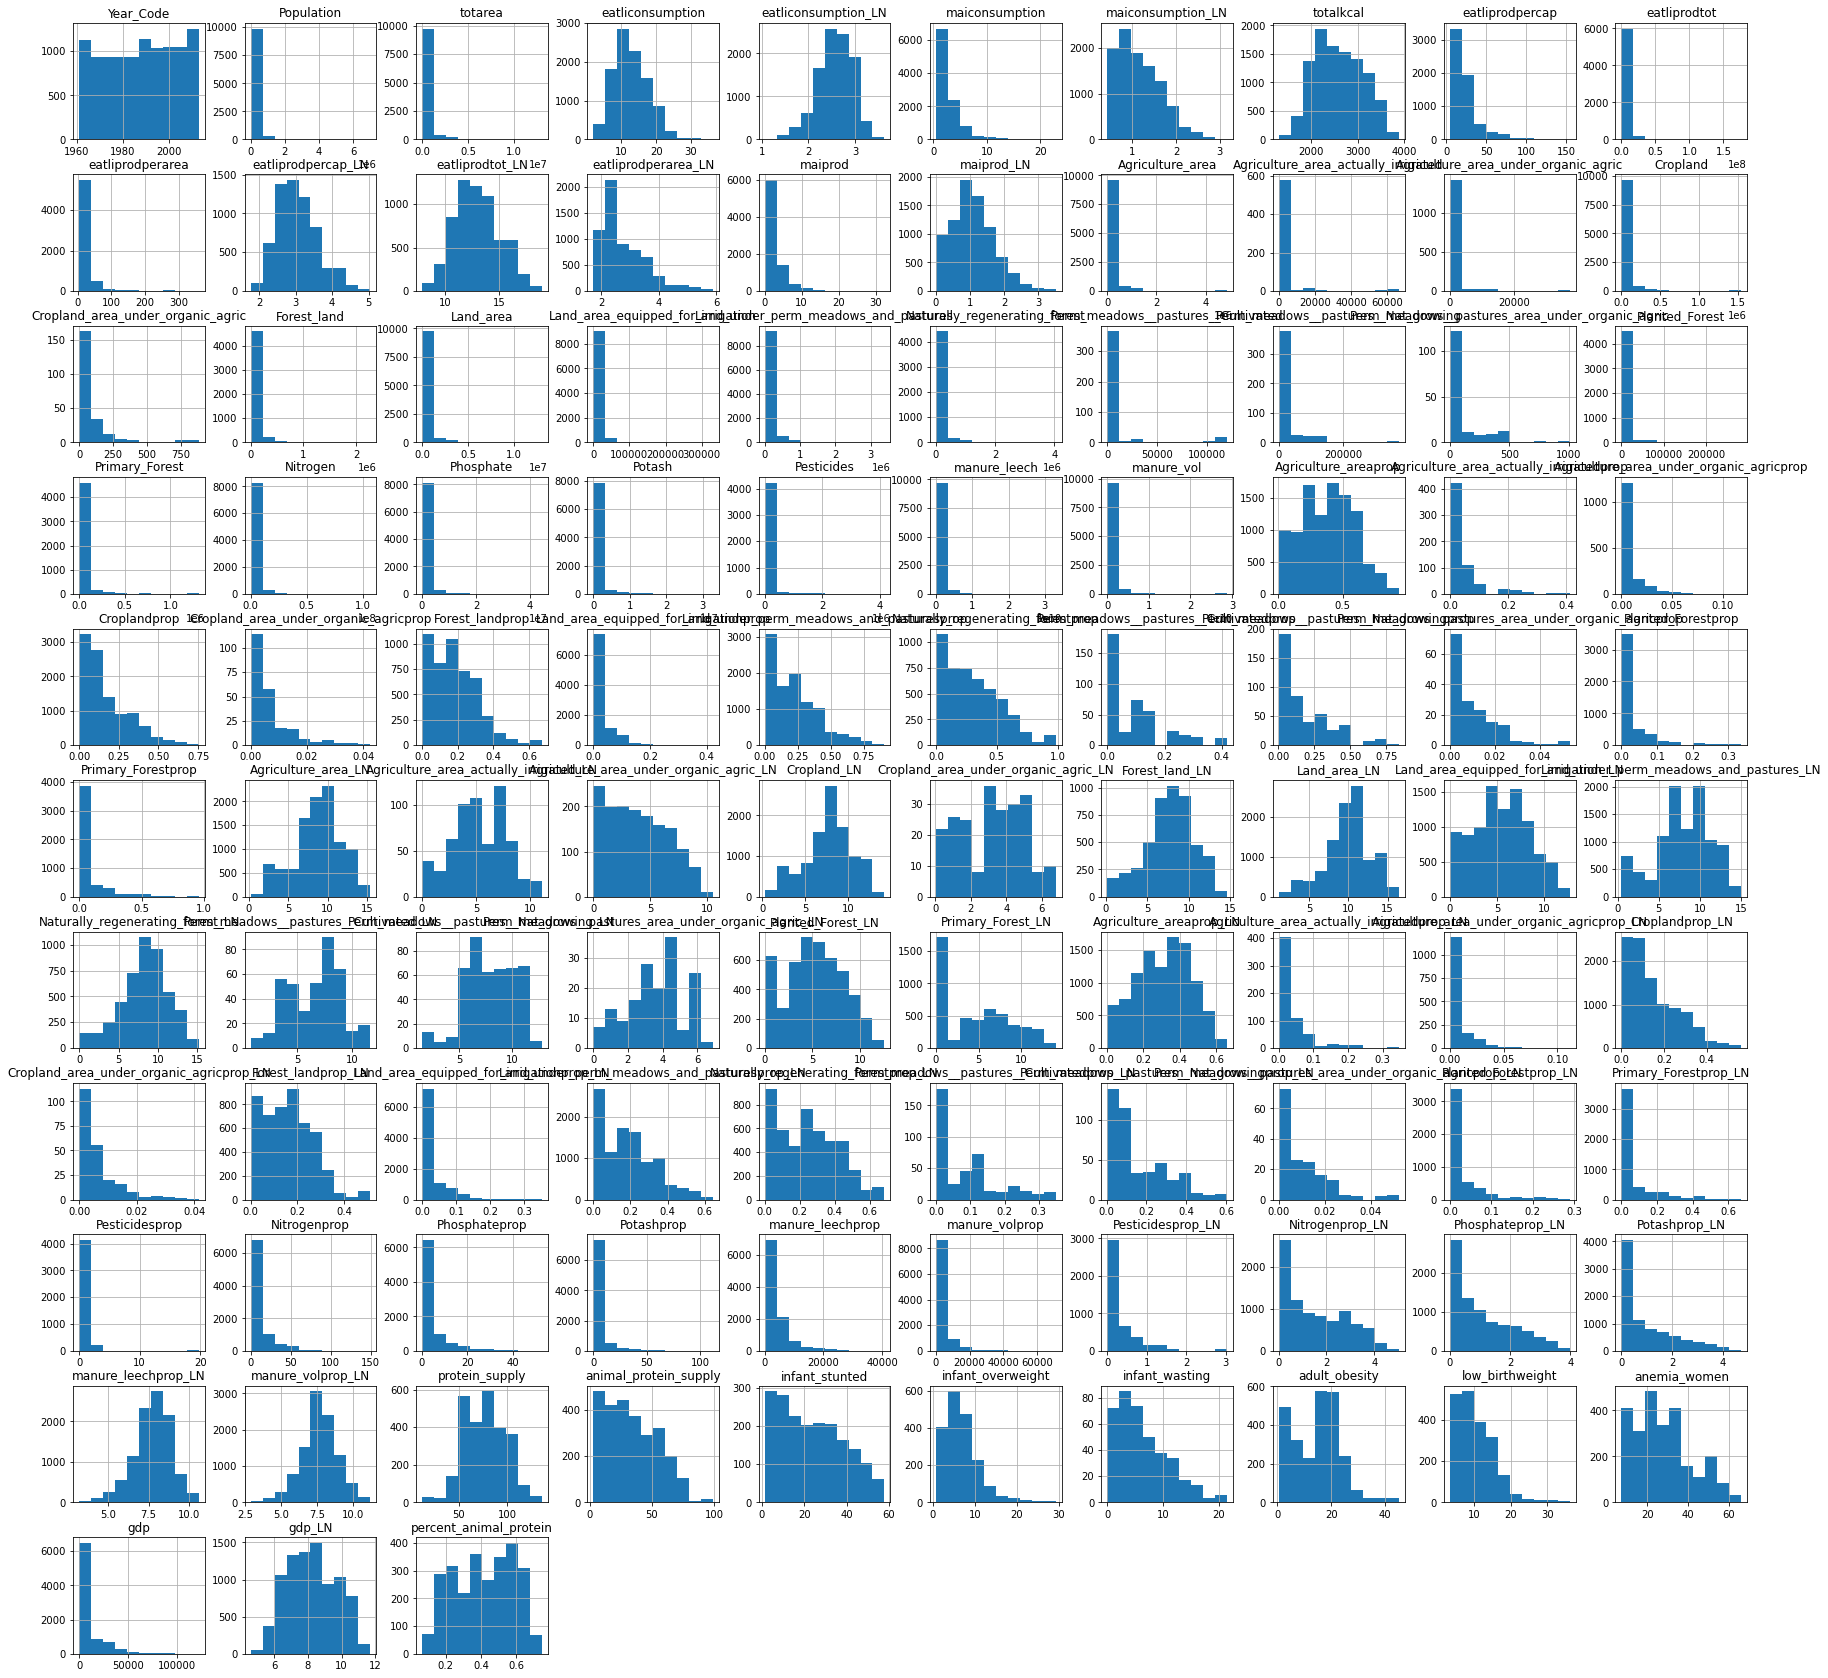

In [139]:
hists = plt.figure(figsize = (30,30))  # Size of the figure
ax = hists.gca()                                
fbs_areaXyear.hist(ax = ax)         # draw a histogram based on the dataset
plt.show()

In [141]:
for col in fbs_areaXyear.columns:
    print(col)

Area
Year_Code
Population
totarea
eatliconsumption
eatliconsumption_LN
maiconsumption
maiconsumption_LN
totalkcal
eatliprodpercap
eatliprodtot
eatliprodperarea
eatliprodpercap_LN
eatliprodtot_LN
eatliprodperarea_LN
maiprod
maiprod_LN
Agriculture_area
Agriculture_area_actually_irrigated
Agriculture_area_under_organic_agric
Cropland
Cropland_area_under_organic_agric
Forest_land
Land_area
Land_area_equipped_for_irrigation
Land_under_perm_meadows_and_pastures
Naturally_regenerating_forest
Perm_meadows__pastures__Cultivated
Perm_meadows__pastures__Nat_growing
Perm_meadows__pastures_area_under_organic_agric
Planted_Forest
Primary_Forest
Nitrogen
Phosphate
Potash
Pesticides
manure_leech
manure_vol
Agriculture_areaprop
Agriculture_area_actually_irrigatedprop
Agriculture_area_under_organic_agricprop
Croplandprop
Cropland_area_under_organic_agricprop
Forest_landprop
Land_area_equipped_for_irrigationprop
Land_under_perm_meadows_and_pasturesprop
Naturally_regenerating_forestprop
Perm_meadows__past

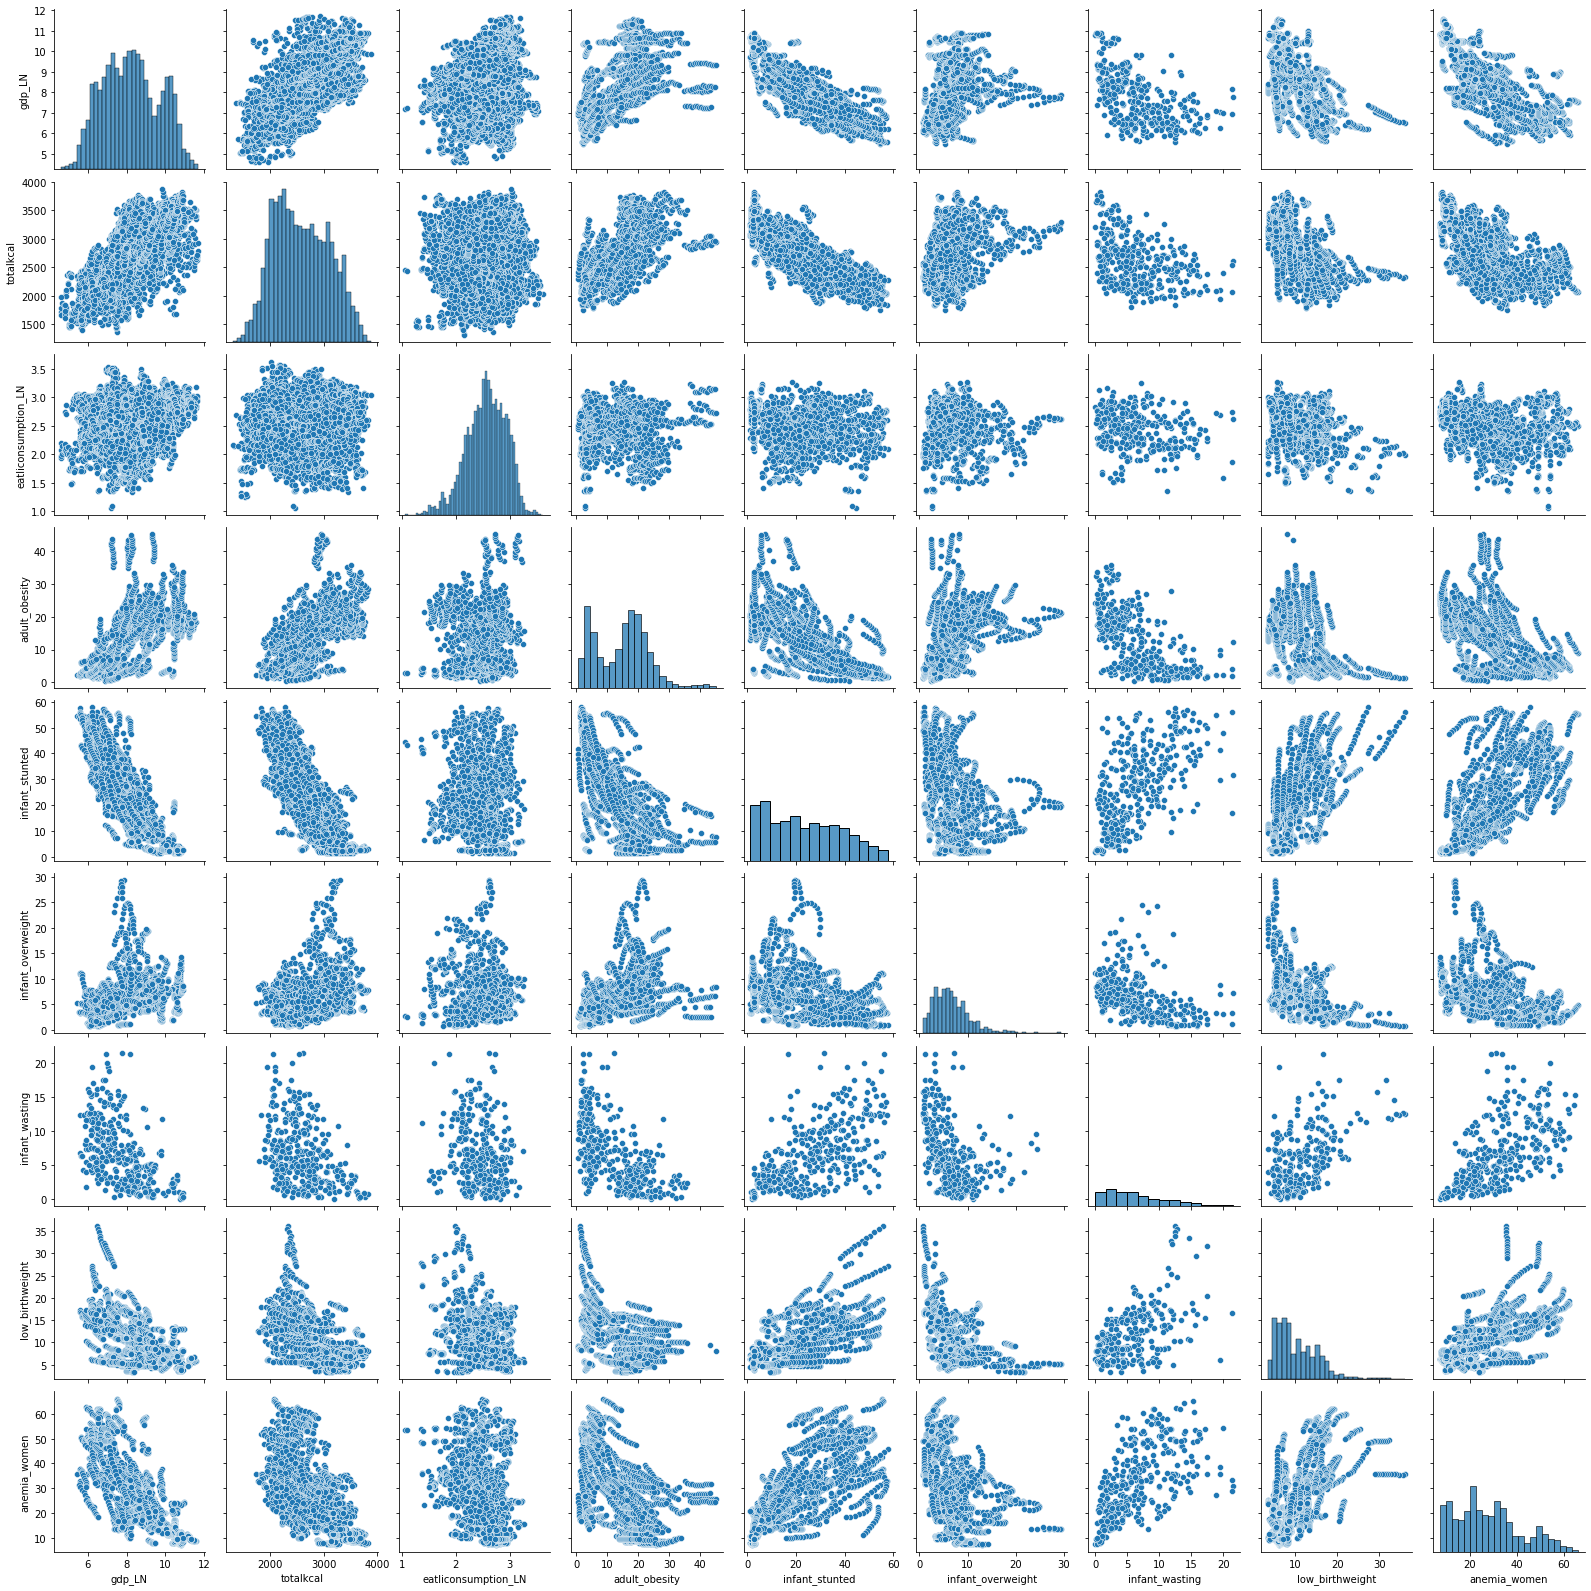

In [142]:
sns.pairplot(fbs_areaXyear[['gdp_LN','totalkcal','eatliconsumption_LN',
                            'adult_obesity','undernourishment','infant_stunted',
                            'infant_overweight','infant_wasting','low_birthweight','anemia_women']])

In [155]:
to_use = ['gdp_LN','totalkcal','eatliconsumption_LN','adult_obesity']
X = ['gdp_LN','totalkcal','eatliconsumption_LN']
y = 'adult_obesity'

In [156]:
# Remove nans
#fbs_areaXyear_panel = fbs_areaXyear.dropna(subset=['gdp','totalkcal','eatliconsumption_LN','adult_obesity'])
fbs_areaXyear_panel = fbs_areaXyear.set_index(['Area', 'Year_Code'])

In [149]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm

exog = sm.tools.tools.add_constant(fbs_areaXyear_panel[X])
endog = fbs_areaXyear_panel[y]
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\T430\anaconda3\lib\site-packages\linearmodels\panel\model.py:855: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [157]:
from linearmodels.panel import PanelOLS
dependent = fbs_areaXyear_panel.adult_obesity
exog = sm.add_constant(fbs_areaXyear_panel[X])
mod = PanelOLS(dependent, exog, entity_effects=True)
res = mod.fit(cov_type='unadjusted')
res

Dep. Variable:,adult_obesity,R-squared:,0.3969
Estimator:,PanelOLS,R-squared (Between):,0.1802
No. Observations:,2486,R-squared (Within):,0.3969
Date:,"Sun, May 22 2022",R-squared (Overall):,0.1867
Time:,05:25:56,Log-likelihood,-3924.3
Cov. Estimator:,Unadjusted,,
,,F-statistic:,502.50
Entities:,192,P-value,0.0000
Avg Obs:,12.948,Distribution:,"F(3,2291)"
Min Obs:,8.0000,,
Max Obs:,13.000,F-statistic (robust):,502.50


In [ ]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = "blue")
ax.axhline(0, color = "r", ls = "--")
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 15)
plt.show()

In [ ]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([fbs_areaXyear_panel, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year_Code'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(fbs_areaXyear_panel[X]).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

In [ ]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

In [153]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
exog = sm.tools.tools.add_constant(fbs_areaXyear_nonaindex[["Agriculture_areaprop","Land_area_equipped_for_irrigationprop_LN","Pesticidesprop_LN","Nitrogenprop_LN","Phosphateprop_LN","Potashprop_LN","manure_leechprop_LN","manure_volprop_LN"]])
endog = fbs_areaXyear_nonaindex['eatliprodperarea_LN']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

fittedvals_fe = fe_res.predict().fitted_values
residuals_fe = fe_res.resids

NameError: name 'fbs_areaXyear_nonaindex' is not defined

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval
hausman_results = hausman(fe_res, re_res) 
print("chi-Squared: " + str(hausman_results[0]))
print("degrees of freedom: " + str(hausman_results[1]))
print("p-Value: " + str(hausman_results[2]))

In [ ]:
# 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_fe, residuals_fe, color = "blue")
ax.axhline(0, color = "r", ls = "--")
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 15)
plt.show()